# Анализ данных интернет-магазин 

**Описание проекта**

Интернет-магазин продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 

**Задача** - разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

**Описание данных:**
Описание данных:

Файл содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении. 
- id — номер покупателя в корпоративной базе данных.
- Покупательская активность (purchasing_activity) — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- Тип сервиса (service_type) — уровень сервиса, например «премиум» и «стандарт».
- Разрешить сообщать (allow_reporting) — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- Маркет_актив_6_мес (marketing_activity_6_month) — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- Маркет_актив_тек_мес (marketing_activity_cur_month) — количество маркетинговых коммуникаций в текущем месяце.
- Длительность (duration) — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- Акционные_покупки (promotional_purchases) — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- Популярная_категория (popular_category) — самая популярная категория товаров у покупателя за последние 6 месяцев.
- Средний_просмотр_категорий_за_визит (avg_cat_views_per_visit) — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- Неоплаченные_продукты_штук_квартал (unpaid_products_pieces_quarter)— общее число неоплаченных товаров в корзине за последние 3 месяца.
- Ошибка_сервиса (service_error)— число сбоев, которые коснулись покупателя во время посещения сайта.
- Страниц_за_визит (pages_per_visit) — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

Файл **market_money** содержит данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

- id — номер покупателя в корпоративной базе данных.
- Период (period) — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- Выручка (revenue) — сумма выручки за период.

Файл **market_time** хранит данные о времени (в минутах), которое покупатель провёл на сайте в течение периода.

- id — номер покупателя в корпоративной базе данных.
- Период (period) — название периода, во время которого зафиксировано общее время.
- минут (time_on_site_min) — значение времени, проведённого на сайте, в минутах.

Файл **money** — это данные о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

- id — номер покупателя в корпоративной базе данных.
- Прибыль — значение прибыли.

## Загрузка данных

### Загрузка и предварительный анализ данных фермы

In [207]:
#установки
!pip install shap
!pip install phik
!pip install optuna-integration
!pip install -U scikit-learn 

In [208]:
# Импорт библиотек для работы с данными
import pandas as pd
import numpy as np

# Импорт библиотек для визуализации
from matplotlib import pyplot as plt
import seaborn as sns

# Импорт библиотек для машинного обучения и обработки данных
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier

# Импорт дополнительных библиотек
import phik
import shap

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [210]:
#выведем на экран первые 5 строк полученного датафрейма market_data
market_data.head()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [211]:
#посмотрим информацию о датафрейме
market_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [212]:
#посмотрим на количество пропущенных значений для каждого столбца
market_data.isna().sum()

id                                     0
Покупательская активность              0
Тип сервиса                            0
Разрешить сообщать                     0
Маркет_актив_6_мес                     0
Маркет_актив_тек_мес                   0
Длительность                           0
Акционные_покупки                      0
Популярная_категория                   0
Средний_просмотр_категорий_за_визит    0
Неоплаченные_продукты_штук_квартал     0
Ошибка_сервиса                         0
Страниц_за_визит                       0
dtype: int64

Данные датафрейма "market_data" представляют собой таблицу с 1300 записями и 13 столбцами. 9 столбцов имеют числовой тип данных (int64, float), остальные 4 - строковый тип данных (object). Тип данных столбцов соответствует информации, представленной в них.
Можно только поправить название столбцов. Также, можно отметить, что в датасете отсутствуют пропуски.

In [214]:
#выведем на экран первые 5 строк полученного датафрейма market_money
market_money.head()

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [215]:
#посмотрим информацию о датафрейме
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [216]:
#посмотрим на количество пропущенных значений для каждого столбца
market_money.isna().sum()

id         0
Период     0
Выручка    0
dtype: int64

Данные представляют собой таблицу с 3900 записями и 3 столбцами. Два столбца имеют числовой тип данных (int64, float), один - строковый тип данных (object). Тип данных столбцов соответствует информации, представленной в них. Можно только поправить название столбцов. Также, можно отметить, что в датасете отсутствуют пропуски.

In [218]:
#выведем на экран первые 5 строк полученного датафрейма market_time
market_time.head()

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [219]:
#посмотрим информацию о датафрейме
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [220]:
#посмотрим на количество пропущенных значений для каждого столбца
market_time.isna().sum()

id        0
Период    0
минут     0
dtype: int64

Данные представляют собой таблицу с 2600 записями и 3 столбцами. Два столбца имеют числовой тип данных (int64), один - строковый тип данных (object). Тип данных столбцов соответствует информации, представленной в них. Также, можно отметить, что в датасете отсутствуют пропуски. Можно только поправить название столбцов. 

In [222]:
#выведем на экран первые 5 строк полученного датафрейма money
money.head()

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


In [223]:
#посмотрим информацию о датафрейме
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [224]:
#посмотрим на количество пропущенных значений для каждого столбца
money.isna().sum()

id         0
Прибыль    0
dtype: int64

Данные представляют собой таблицу с 1300 записями и 2 столбцами. Два столбца имеют числовой тип данных (int64, float). Тип данных столбцов соответствует информации, представленной в них. Также, можно отметить, что в датасете отсутствуют пропуски. Можно только поправить название столбцов.

##  Предобработка данных

### Исправление наименований столбцов

Названия столбцов у нас указаны на кириллице, за исключением id, где-то начинается с прописной, где-то со строчной. Предлагаю все привести к одному виду: название написать на английском языке, привести все к нижнему регистру, разделить слова с помощью нижнего подчеркивания.

In [225]:
#поправим названия столбцов market_data
market_data = market_data.rename(columns={'Покупательская активность':'purchasing_activity', 'Тип сервиса': 'service_type', 'Разрешить сообщать': 'allow_reporting', 'Маркет_актив_6_мес': 'marketing_activity_6_month', 'Маркет_актив_тек_мес': 'marketing_activity_cur_month', 'Длительность':'duration', 'Акционные_покупки': 'promotional_purchases', 'Популярная_категория': 'popular_category', 'Средний_просмотр_категорий_за_визит': 'avg_cat_views_per_visit', 'Неоплаченные_продукты_штук_квартал': 'unpaid_products_pieces_quarter', 'Ошибка_сервиса': 'service_error', 'Страниц_за_визит':'pages_per_visit'})

In [226]:
# выведем первые 5 строк полученного датафрейма на экран
market_data.head()

,id,purchasing_activity,service_type,allow_reporting,marketing_activity_6_month,marketing_activity_cur_month,duration,promotional_purchases,popular_category,avg_cat_views_per_visit,unpaid_products_pieces_quarter,service_error,pages_per_visit
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [227]:
#поправим названия столбцов market_money
market_money = market_money.rename(columns={'Период': 'period','Выручка': 'revenue'})

In [228]:
# выведем первые 5 строк полученного датафрейма на экран
market_money.head()

,id,period,revenue
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [229]:
#поправим названия столбцов market_time
market_time = market_time.rename(columns={'Период': 'period','минут': 'time_on_site_min'})

In [230]:
# выведем первые 5 строк полученного датафрейма на экран
market_time.head()

,id,period,time_on_site_min
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [231]:
#поправим названия столбцов money
money = money.rename(columns={'Прибыль': 'income'})

In [232]:
# выведем первые 5 строк полученного датафрейма на экран
money.head()

,id,income
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


### Определение наличия явных и неявных дубликатов

####  Определения наличия явных дубликатов

In [233]:
#проверим наличие явных дубликатов в датафрейме market_data
market_data.duplicated().sum()

0

In [234]:
#проверим наличие явных дубликатов в датафрейме market_time
market_time.duplicated().sum()

0

In [235]:
#проверим наличие явных дубликатов в датафрейме market_money
market_money.duplicated().sum()

0

In [236]:
#проверим наличие явных дубликатов в датафрейме money
money.duplicated().sum()

0

Во всех четырех датафреймах явных дубликатов не обнаружено

#### Определение наличия неявных дубликатов

Теперь проверим неявные дубликаты в датасете market_data

In [237]:
market_data.head()

,id,purchasing_activity,service_type,allow_reporting,marketing_activity_6_month,marketing_activity_cur_month,duration,promotional_purchases,popular_category,avg_cat_views_per_visit,unpaid_products_pieces_quarter,service_error,pages_per_visit
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [238]:
# проверим на дубликаты по определённым признакам
key_columns = ['id', 'service_type', 'allow_reporting']
duplicates_key = market_data[market_data.duplicated(subset=key_columns)]

In [239]:
duplicates_key

,id,purchasing_activity,service_type,allow_reporting,marketing_activity_6_month,marketing_activity_cur_month,duration,promotional_purchases,popular_category,avg_cat_views_per_visit,unpaid_products_pieces_quarter,service_error,pages_per_visit


####  Анализ столбцов категориальных данных

In [240]:
#выведем на экран все уникальные значения столбца 'purchasing_activity'
market_data['purchasing_activity'].unique()

array(['Снизилась', 'Прежний уровень'], dtype=object)

В столбце 'purchasing_activity' представлено только 2 варианта активности: "прежний уровень" и "снизилась"

In [241]:
#выведем на экран все уникальные данные столбца 'service_type'
market_data['service_type'].unique()

array(['премиум', 'стандартт', 'стандарт'], dtype=object)

Тут мы видим ошибку в написании слова стандарт. Исправим это

In [242]:
#исправим 'стандартт' на 'стандарт'
market_data['service_type'] = market_data['service_type'].replace('стандартт', 'стандарт')

In [243]:
#проверим
market_data['service_type'].unique()

array(['премиум', 'стандарт'], dtype=object)

In [244]:
#выведем на экран все уникальные значения столбца 'allow_reporting'
market_data['allow_reporting'].unique()

array(['да', 'нет'], dtype=object)

В столбце 'allow_reporting' представлено только 2 варианта возможности присылать предложения: "да" и "нет". Тут проблем нет

In [245]:
#выведем на экран все уникальные значения столбца 'popular_category'
market_data['popular_category'].unique()

array(['Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'], dtype=object)

В данном столбце представлены 6 категорий: 'Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары',
       'Техника для красоты и здоровья', 'Кухонная посуда',
       'Мелкая бытовая техника и электроника'. Тут также проблем нет

Теперь проверим как обстоят дела с датафреймом market_money

In [246]:
#выведем на экран все уникальные значения столбца 'period'
market_money['period'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

In [247]:
market_money['period'].value_counts()

текущий_месяц          1300
предыдущий_месяц       1300
препредыдущий_месяц    1300
Name: period, dtype: int64

Судя по всему тут представлены данные за 3 месяца: текущий, предыдущий и препредыдущий

Теперь проверим как обстоят дела с датафреймом market_time

In [248]:
#выведем на экран все уникальные значения столбца 'period'
market_time['period'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

Тут представлены данные за 2 месяца: текущий и предыдущий. Поправим только написание "предыдцщий_месяц"

In [249]:
#Поправим написание "предыдцщий_месяц"
market_time['period'] = market_time['period'].replace('предыдцщий_месяц', 'предыдущий_месяц')

In [250]:
#проверим
market_time['period'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

Теперь все ок

## Исследовательский анализ данных

### Статистический анализ признаков

In [251]:
#выведем статистические данные по датасету market_data
market_data.describe()

,id,marketing_activity_6_month,marketing_activity_cur_month,duration,promotional_purchases,avg_cat_views_per_visit,unpaid_products_pieces_quarter,service_error,pages_per_visit
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


Рассмотрим полученные статистические результаты для каждого признака в нашем датафрейме market_data: 

1)  Среднее значение маркетинговой активности за последние 6 месяцев составляет 4.25, с стандартным отклонением 1.01. Значения варьируются от 0.90 до 6.60. 75% данных имеют значение маркетинговой активности до 4.90.

2) Среднее значение маркетинговой активности за текущий месяц равно 4.01, с стандартным отклонением 0.70. Значения варьируются от 3.00 до 5.00. Медианное значение составляет 4.00, и 75% значений находятся до 4.00.

3) Среднее время, которое прошло с момента регистрации составляет 601.90, с стандартным отклонением 249.86. Значения варьируются от 110 до 1079. Медиана составляет 606.00, и 75% данных имеют значение продолжительности до 806.00.

4) Среднее значение промоционных покупок составляет 0.32, с стандартным отклонением 0.25. Значения варьируются от 0.00 до 0.99. Медиана равна 0.24, и 75% данных имеют значение до 0.30.

5) Среднее количество просмотров категории за визит составляет 3.27, с стандартным отклонением 1.36. Значения варьируются от 1.00 до 6.00. Медиана составляет 3.00, и 75% данных имеют значение до 4.00.

6) Среднее количество неоплаченных продуктов за квартал равно 2.84, с стандартным отклонением 1.97. Значения варьируются от 0.00 до 10.00. Медиана составляет 3.00, и 75% данных имеют значение до 4.00.

7) Среднее значение сбоев во время посещения сайта составляет 4.19, с стандартным отклонением 1.96. Значения варьируются от 0.00 до 9.00. Медиана равна 4.00, и 75% данных имеют значение до 6.00.

8) Среднее количество страниц, которые просмотрел покупатель за визит составляет 8.18, с стандартным отклонением 3.98. Значения варьируются от 1.00 до 20.00. Медиана составляет 8.00, и 75% данных имеют значение до 11.00.

In [252]:
#выведем статистические данные по датасету market_money
market_money.describe()

,id,revenue
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


Согласно данной таблице, доходы варьируются от 0 до более чем 100 тысяч, с существенными отклонениями от среднего значения. Средний доход составляет около 5025.70, но из-за большого стандартного отклонения (1777.70) распределение доходов имеет широкий разброс. Значение дохода в 106,862.20 значительно превышает 75-й процентиль (5363.00), что может указывать на наличие выбросов или аномальных значений в данных. Доходы в основном сосредоточены в диапазоне от 4590.15 до 5363.00, но с возможными крайними значениями, которые сильно превышают этот диапазон.

In [253]:
#выведем статистические данные по датасету market_time
market_time.describe()

,id,time_on_site_min
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


Время, проведенное на сайте, в среднем составляет 13.34 минуты. Это показывает, что большинство пользователей проводят на сайте около этого времени. Стандартное отклонение 4.08 минут указывает на умеренный разброс вокруг среднего значения. Время, проведенное на сайте, может сильно варьироваться между пользователями. 25% пользователей проводят на сайте менее 10 минут, а 75% - менее 16 минут. Это демонстрирует, что большинство пользователей находятся в пределах этих значений. Максимальное значение 23 минуты указывает на то, что некоторые пользователи могут проводить значительно больше времени на сайте по сравнению с большинством.

In [254]:
#выведем статистические данные по датасету money
money.describe()

,id,income
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


### Визуализация и анализ количественных и категориальных признаков

In [255]:
#напомним какие столбцы есть в датафрейме market_data
market_data.head(2)

,id,purchasing_activity,service_type,allow_reporting,marketing_activity_6_month,marketing_activity_cur_month,duration,promotional_purchases,popular_category,avg_cat_views_per_visit,unpaid_products_pieces_quarter,service_error,pages_per_visit
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5


In [256]:
#напишем функцию для построения гистограммы для каждого количественного признака 
#сначала укажем количественные признаки
quantitative_columns = ['marketing_activity_6_month', 'duration', 'promotional_purchases', 'pages_per_visit']

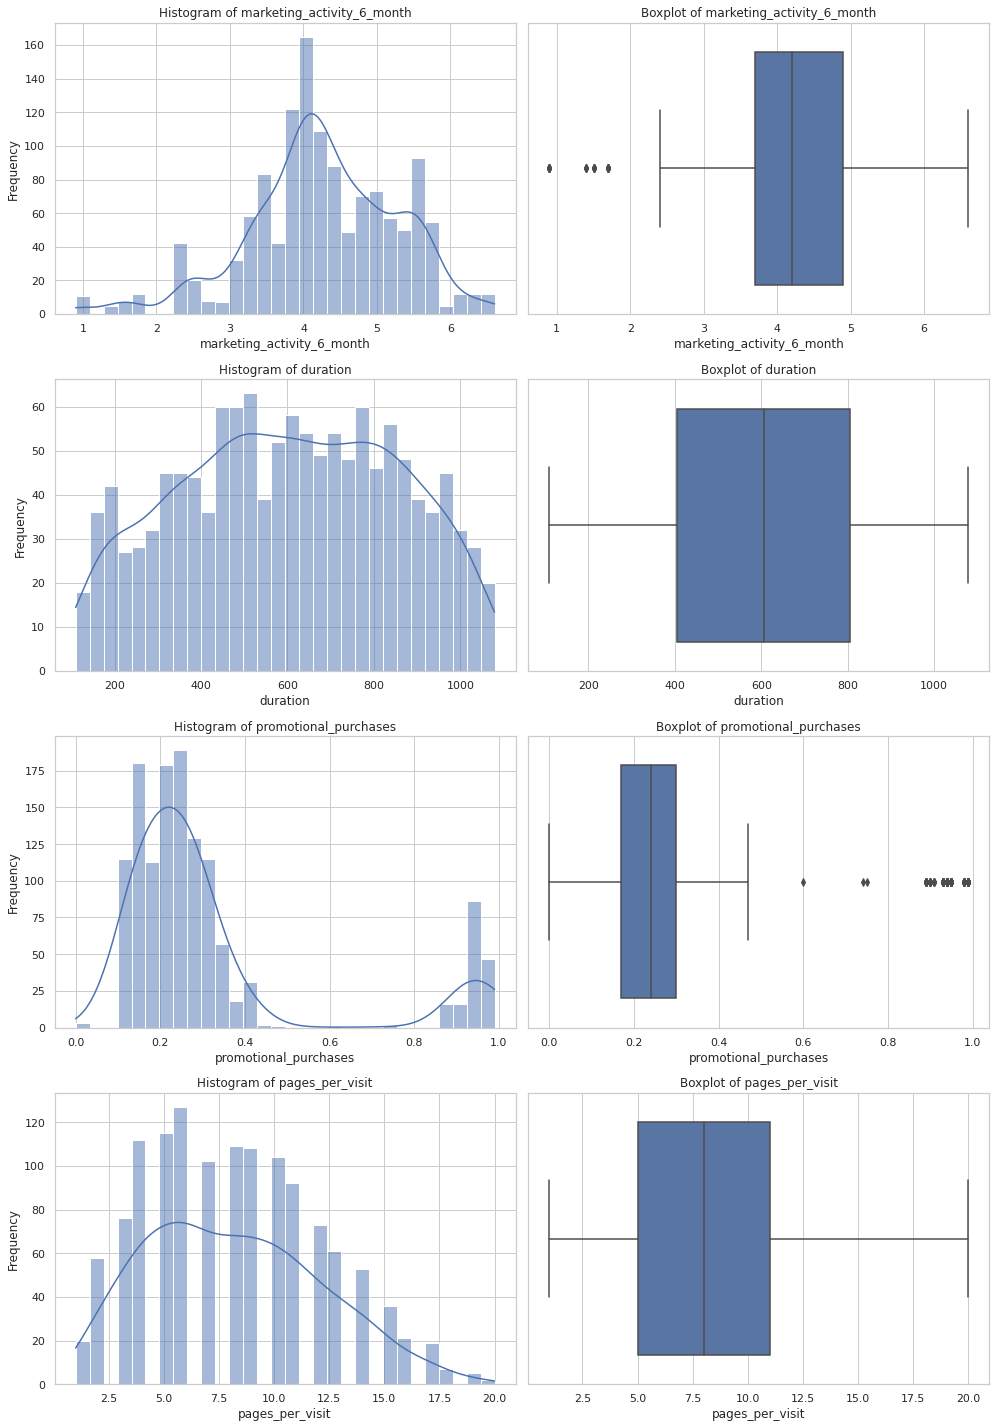

In [257]:
#определим количество строк и столбцов для подграфиков 
num_features = len(quantitative_columns)
fig, axes = plt.subplots(nrows=num_features, ncols=2, figsize=(14, num_features * 5))

#построим графики
for i, column in enumerate(quantitative_columns):
    #построим гистограмму
    sns.histplot(market_data[column], bins = 30, kde =True, ax=axes[i,0])
    axes[i,0].set_title(f'Histogram of {column}')
    axes[i,0].set_xlabel(column)
    axes[i,0].set_ylabel('Frequency')
    
    #построим боксплот
    sns.boxplot(x=market_data[column], ax=axes[i, 1])
    axes[i,1].set_title(f'Boxplot of {column}')
    axes[i,1].set_xlabel(column)
    
plt.tight_layout()
plt.show()

Посмотрим, что можно сказать о характере распределения данных: 1) Данные по среднемесячному значению маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Данные варьируются от 0.9 до 6.6. Можно отметить отклонение от симметрии в данных, распределение чуть скошено вправо с пиком в  точке 4.25. 2) Данные значения, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте. Данные варьируются от 110 до 1079 дней. В распределении можно ответить два неявных пика в диапазоне от 400 до 800 дней, само распределение скошено вправо 3) Данные по среднемесячной доле покупок по акции от общего числа покупок за последние 6 месяцев. Данные варьируются от 0 до 0.99. Можно ответить два выраженных пика в точках 0.2 и 0.9. Возможно, все, что более 0.5 можно считать выбросами. 4) Данные о  среднем количестве страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца. Данные распределены от 0 до 20, с неявными пиками в точках 5 и 9. Распределение смещено влево.  

In [258]:
#напишем функцию для построения гистограммы для каждого категориального признака и дескретных значений
#сначала укажем, какие признаки у нас относятся к категориальным и дискретным значениям
categorical_disc_columns = ['purchasing_activity','service_type', 'allow_reporting', 'popular_category', 'marketing_activity_cur_month', 'avg_cat_views_per_visit', 'unpaid_products_pieces_quarter', 'service_error']

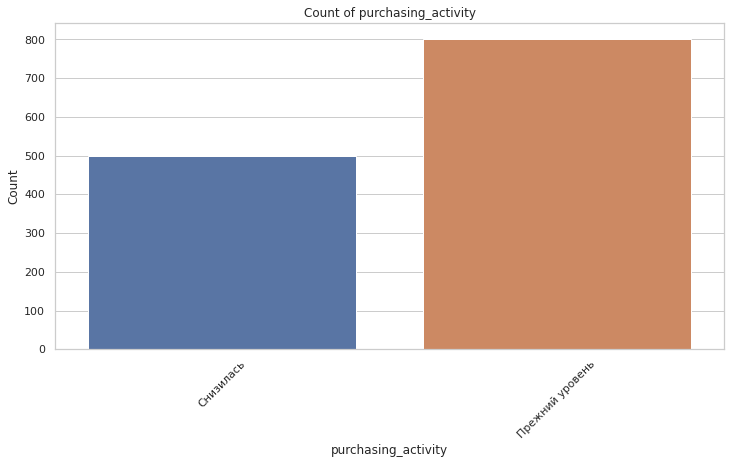

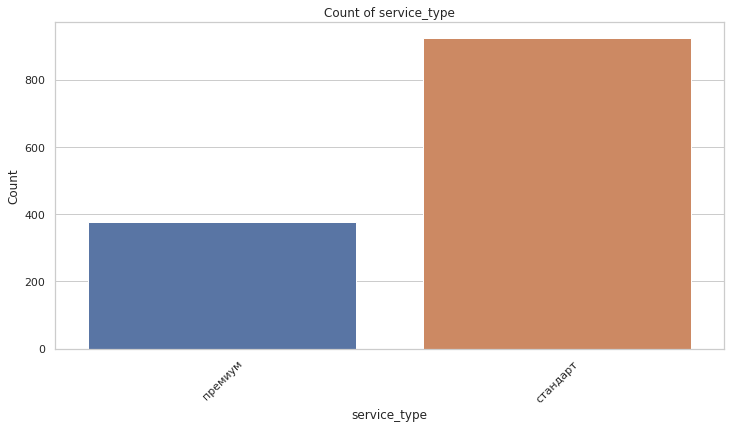

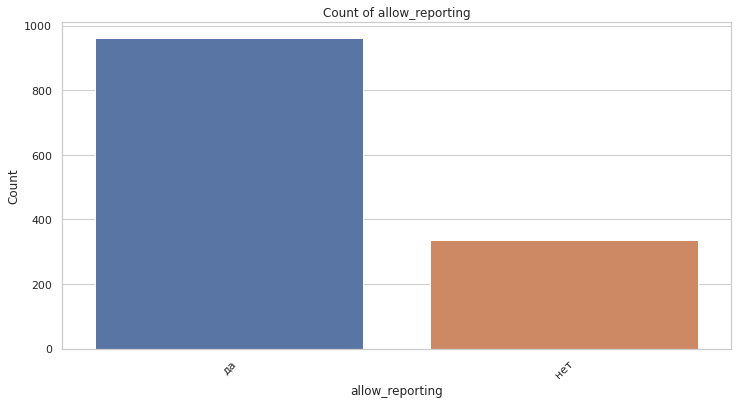

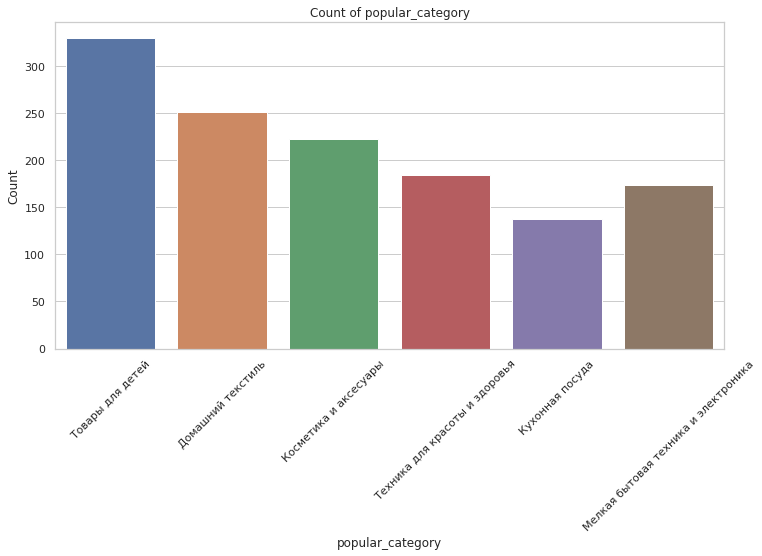

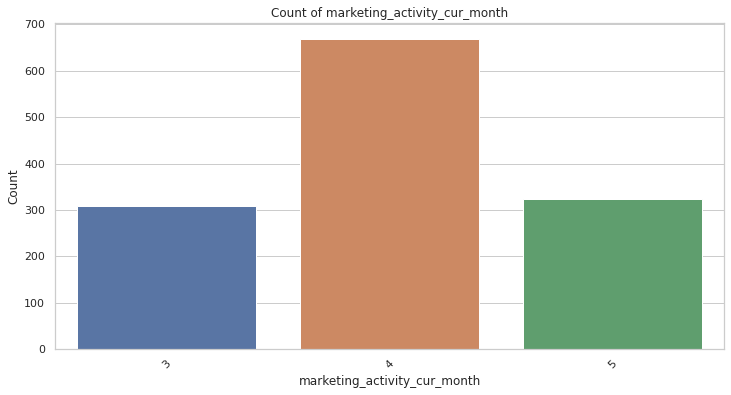

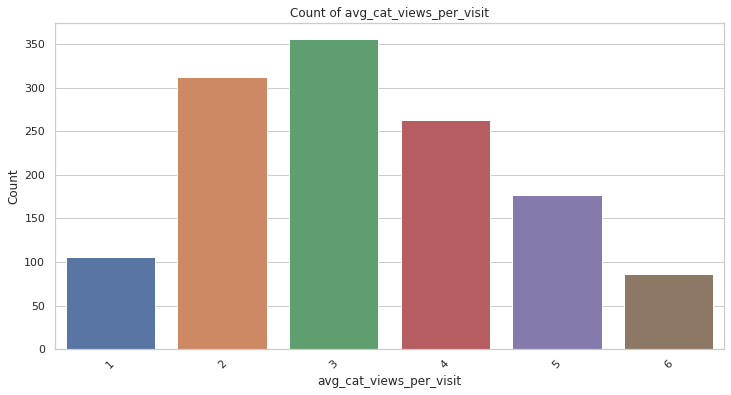

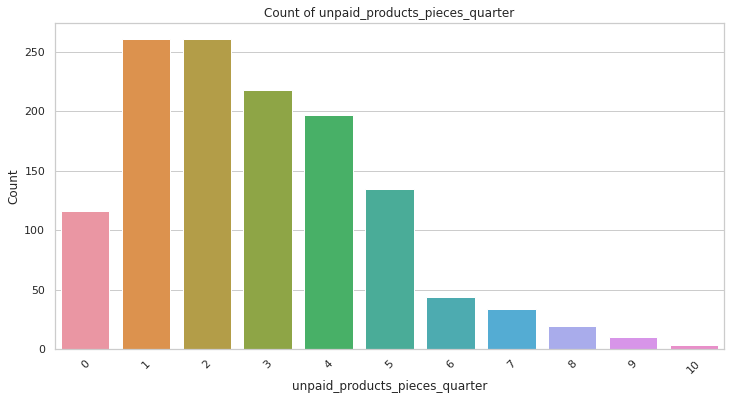

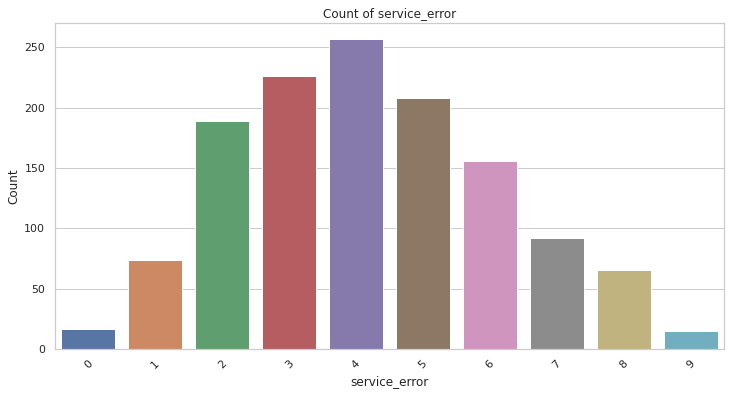

In [259]:
#напишем функцию для построения графиков для категориальных данных
for column in categorical_disc_columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=column, data=market_data)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

Согласно результатам большинство покупателей остались с прежнем уровнем активности (800 с прежним и у 500 клиентов покупательская способность снизилась). Большинство покупателей представлено с сервисом "стандарт" (примерно 900 стандарт и ок 400 клиентов с сервисом "премиум"). Большинство клиентов согласны на дополнительную рассылку предложений (примерно 1000 согласны, 350 против). Самыми популярными категориями являются: товары для детей, домашний текстиль и косметика и аксесуары.
Данные по количеству маркетинговых коммуникаций в текущем месяце варьируются от 3 до 5 с максимум в точке 4. Данные о среднем количестве категорий, которые покупатель просмотрел за визит в течение последнего месяца варьируются от 1 до 6, с максимумом в точке 3. Данные по общему числу неоплаченных товаров в корзине за последние 3 месяца, варьируются от 0 до 10, с максимумами в точках 1-2. Данные о количестве сбоев, которые коснулись покупателя во время посещения сайта, распределены от 0 до 9 с максимум в точке 4. 

Теперь посмотрим на датафрейм market_money

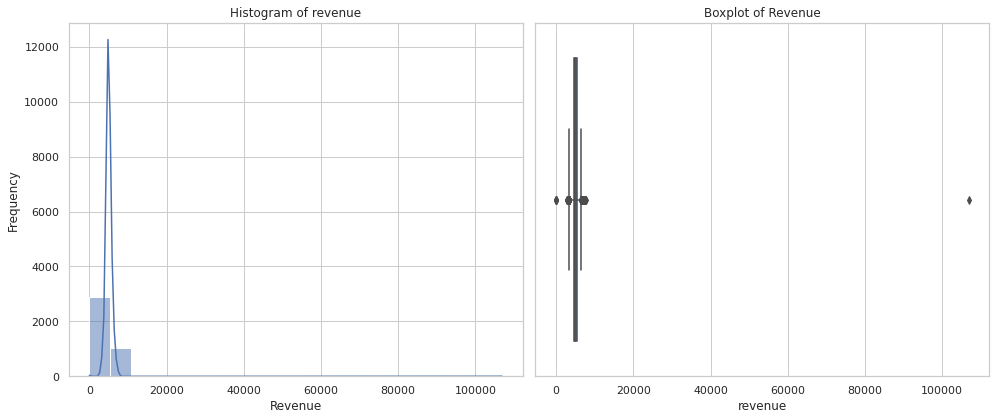

In [260]:
# установим стиль графиков
sns.set(style="whitegrid")

# создадим фигуру и оси для графиков
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# построим гистограмму
sns.histplot(market_money['revenue'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Histogram of revenue')
axes[0].set_xlabel('Revenue')
axes[0].set_ylabel('Frequency')

# построим боксплот
sns.boxplot(x=market_money['revenue'], ax=axes[1])
axes[1].set_title('Boxplot of Revenue')
axes[1].set_xlabel('revenue')

# выведем графики на экран
plt.tight_layout()
plt.show()

Тут видны явные выбросы в данных по вырочке. Значение дохода в 106862.20 значительно превышает 75-й процентиль (5363.00), что может указывать на наличие выбросов или аномальных значений в данных. Доходы в основном сосредоточены в диапазоне от 4590.15 до 5363.00, но с возможными крайними значениями, которые сильно превышают этот диапазон. Думаю, что значения больше 8000- 10000 можно удалить

In [261]:
market_money.query('revenue > 8000')

,id,period,revenue
98,215380,текущий_месяц,106862.2


Действительно, такая ситуация всего одна, от которой мы можем избавиться

In [262]:
#удалим данные с revenue > 8000
market_money = market_money.query('revenue < 10000')

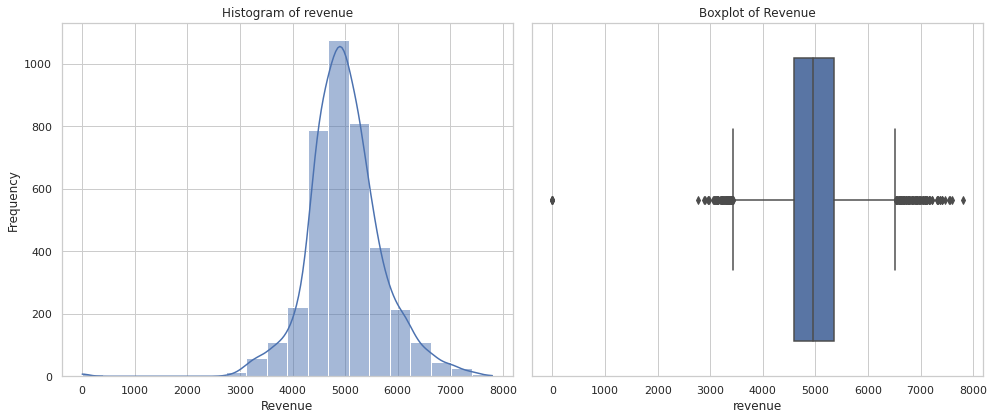

In [263]:
#повторим график
# установим стиль графиков
sns.set(style="whitegrid")

# создадим фигуру и оси для графиков
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# построим гистограмму
sns.histplot(market_money['revenue'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Histogram of revenue')
axes[0].set_xlabel('Revenue')
axes[0].set_ylabel('Frequency')

# построим боксплот
sns.boxplot(x=market_money['revenue'], ax=axes[1])
axes[1].set_title('Boxplot of Revenue')
axes[1].set_xlabel('revenue')

# выведем графики на экран
plt.tight_layout()
plt.show()

Тут уже можно отметить также выброс в районе 0. Таких событий/клиентов 6

In [264]:
market_money.query('revenue < 2000')

,id,period,revenue
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


In [265]:
#Удалим их, так как они неактивные
market_money = market_money.query('revenue > 2000')

Посмотрим на категориальные данные датафрема market_money

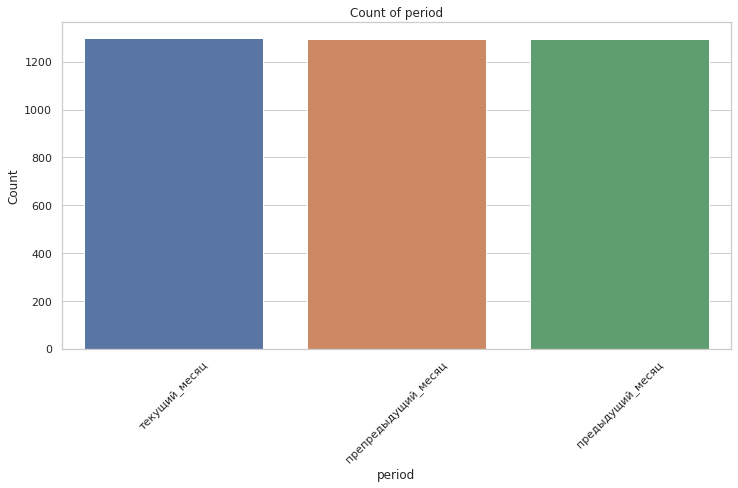

In [266]:
# построим график для категориального признака 'period'
plt.figure(figsize=(12, 6))
sns.countplot(x=market_money['period'], data=market_money)
plt.title('Count of period')
plt.xlabel('period')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Данные равномерно распределены на 3 периода: "текущий, предыдущий и препредыдущий месяц"

Теперь приступим к датафрейму market_time

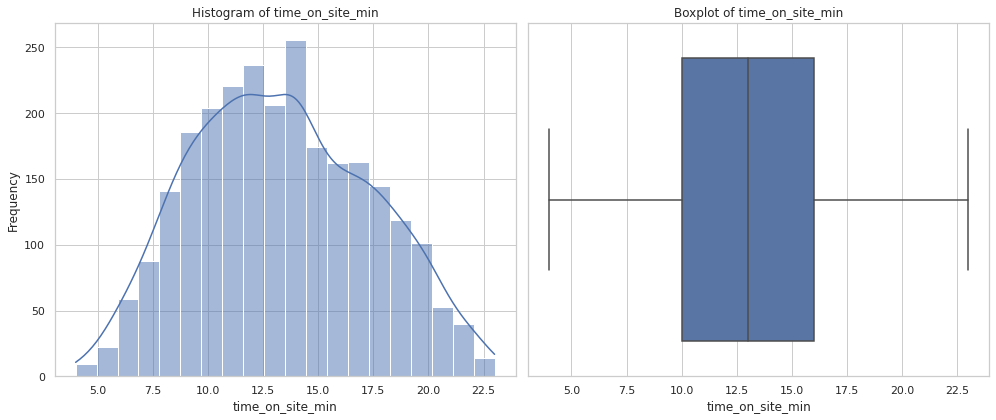

In [267]:
# установим стиль графиков
sns.set(style="whitegrid")
# создадим фигуру и оси для графиков
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# построим гистограмму
sns.histplot(market_time['time_on_site_min'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Histogram of time_on_site_min')
axes[0].set_xlabel('time_on_site_min')
axes[0].set_ylabel('Frequency')
# построим боксплот
sns.boxplot(x=market_time['time_on_site_min'], ax=axes[1])
axes[1].set_title('Boxplot of time_on_site_min')
axes[1].set_xlabel('time_on_site_min')

# выведем графики на экран
plt.tight_layout()
plt.show()

Данные о времени, проведенном на сайте распределены более менее равномерно с широким пиком (ок 12-14 мин) и выступом в точке 17.5 мин. Распределение смещено чуть влево. Это может указывать на то, что время, проведенное на сайте, в целом ниже средней величины, и большая часть пользователей проводит меньше времени на сайте, чем среднее значение. (13.3 мин). Выбросов в данных не обнаружено

Далее посмотрим на категориальный признак 'period'

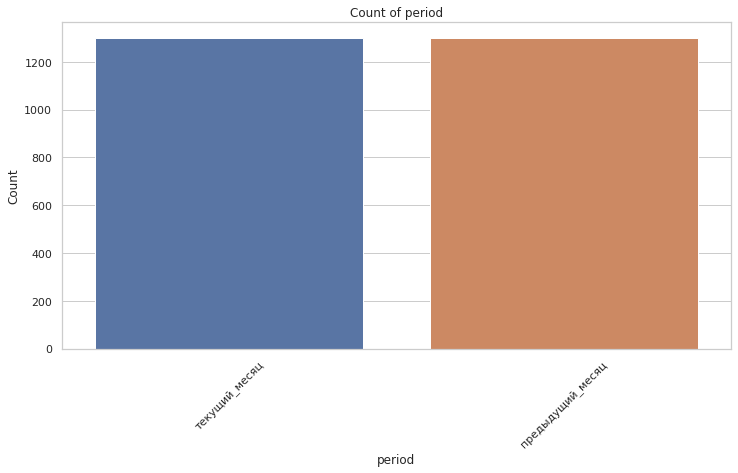

In [268]:
# построим график для категориального признака 'period'
plt.figure(figsize=(12, 6))
sns.countplot(x=market_time['period'], data=market_time)
plt.title('Count of period')
plt.xlabel('period')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Данные равномерно распределены на 2 периода: "текущий и предыдущий месяц"

Посмотрим на данные датафрейма money

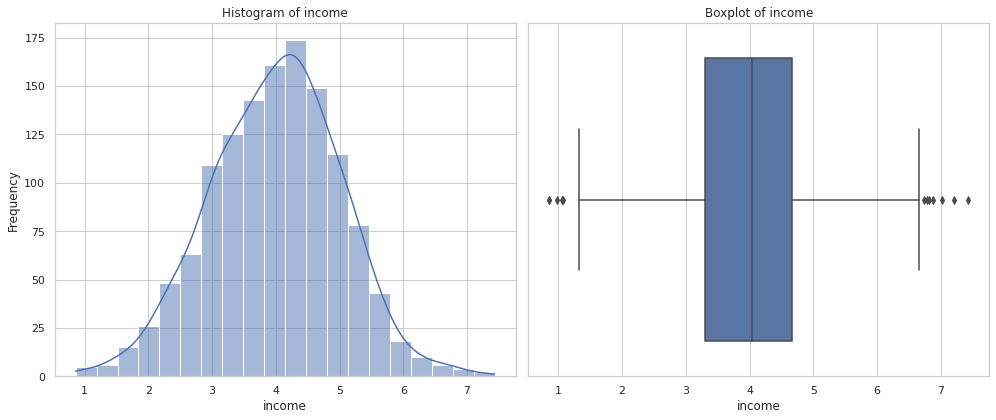

In [269]:
# установим стиль графиков
sns.set(style="whitegrid")
# создадим фигуру и оси для графиков
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# построим гистограмму
sns.histplot(money['income'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Histogram of income')
axes[0].set_xlabel('income')
axes[0].set_ylabel('Frequency')
# построим боксплот
sns.boxplot(x=money['income'], ax=axes[1])
axes[1].set_title('Boxplot of income')
axes[1].set_xlabel('income')

# выведем графики на экран
plt.tight_layout()
plt.show()

Согласно графику распределение дохода в датафрейме money чуть смещено вправо с выраженным пиком в точке 3.99. 

Далее отберем клиентов с покупательской активностью в течении трёх месяцев, то есть таких, которые что-либо покупали в этот период.

In [270]:
clients = market_money.groupby('id')['revenue'].agg('sum').reset_index()

# Переименование столбцов
clients.columns = ['id', 'revenue']

In [271]:
clients.head()

,id,revenue
0,215348,3293.1
1,215349,14659.6
2,215350,15341.9
3,215351,17561.4
4,215352,16274.0


In [272]:
clients.shape

(1300, 2)

In [273]:
clients.query('revenue < 1')

,id,revenue


In [274]:
active_clients = market_data[market_data['id'].isin(clients['id'])]

In [275]:
active_clients.shape

(1300, 13)

Таких клиентов нашлось 1300 человек

## Объединение таблиц

In [276]:
# Фильтруем таблицы по активным клиентам
market_data_active = market_data[market_data['id'].isin(active_clients['id'])]
market_money_active = market_money[market_money['id'].isin(active_clients['id'])]
market_time_active = market_time[market_time['id'].isin(active_clients['id'])]

In [277]:
market_data_active

,id,purchasing_activity,service_type,allow_reporting,marketing_activity_6_month,marketing_activity_cur_month,duration,promotional_purchases,popular_category,avg_cat_views_per_visit,unpaid_products_pieces_quarter,service_error,pages_per_visit
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7


In [278]:
market_money_active.head()

,id,period,revenue
1,215348,текущий_месяц,3293.1
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0


In [279]:
market_data_active.shape

(1300, 13)

In [280]:
market_data_active.id.nunique()

1300

In [281]:
market_money_active.shape

(3893, 3)

Данный датафрейм в 3 раза больше, чем market_data_active поскольку тут 3 раза повторяются индексы, так как данные представлены за 3 периода: предыдущий, препредыдущий и текущий.

market_money_active.id.nunique()

In [282]:
market_time_active.shape

(2600, 3)

Данный датафрейм в 2 раза больше, чем market_data_active поскольку тут 2 раза повторяются индексы, так как данные представлены за 2 периода: предыдущий и текущий.

In [283]:
t = set(market_data_active.id) | set(market_money_active.id) | set(market_time_active.id)
len(t)

1300

In [284]:
len(set(market_data_active.id).union(set(market_money_active.id), set(market_time_active.id)))

1300

In [285]:
# преобразуем DataFrame market_money_active что бы вывести наши периоды как столбцы, используя pivot
df_pivot = market_money_active.pivot(index='id', columns='period', values='revenue')
#сбросим индекса и переименование столбцов
df_pivot = df_pivot.reset_index()
df_pivot.columns.name = None  # Убираем имя индекса столбцов

In [286]:
#выведем 5 строк полученного датафрейма
df_pivot.head()

,id,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
0,215348,NaN,NaN,3293.1
1,215349,5216.0,4472.0,4971.6
2,215350,5457.5,4826.0,5058.4
3,215351,6158.0,4793.0,6610.4
4,215352,5807.5,4594.0,5872.5


Теперь все ок

In [287]:
# преобразуем DataFrame market_time_active что бы вывести наши периоды как столбцы, используя pivot
df_pivot2 = market_time_active.pivot(index='id', columns='period', values='time_on_site_min')
#сбросим индекса и переименование столбцов
df_pivot2 = df_pivot2.reset_index()
df_pivot2.columns.name = None  # Убираем имя индекса столбцов

In [288]:
df_pivot2.shape

(1300, 3)

Теперь все хорошо и можем объединять все таблицы

In [289]:
# Объединяем market_file и market_money по 'id'
merged_data = pd.merge(market_data_active, df_pivot, on='id', how='inner')

# Объединяем результат с market_time по 'id' и 'period'
final_data = pd.merge(merged_data, df_pivot2, on='id', how='inner')

In [290]:
merged_data.head()

,id,purchasing_activity,service_type,allow_reporting,marketing_activity_6_month,marketing_activity_cur_month,duration,promotional_purchases,popular_category,avg_cat_views_per_visit,unpaid_products_pieces_quarter,service_error,pages_per_visit,предыдущий_месяц,препредыдущий_месяц,текущий_месяц
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,NaN,NaN,3293.1
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5


In [291]:
final_data.head()

,id,purchasing_activity,service_type,allow_reporting,marketing_activity_6_month,marketing_activity_cur_month,duration,promotional_purchases,popular_category,avg_cat_views_per_visit,unpaid_products_pieces_quarter,service_error,pages_per_visit,предыдущий_месяц_x,препредыдущий_месяц,текущий_месяц_x,предыдущий_месяц_y,текущий_месяц_y
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,NaN,NaN,3293.1,13,14
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11


In [292]:
#чуть подправим наименования столбцов
final_data = final_data.rename(columns={'текущий_месяц_x':'revenue_cur_month', 'предыдущий_месяц_x':'revenue_prev_month', 'препредыдущий_месяц' : 'revenue_2_month_ago', 'предыдущий_месяц_y': 'timesite_prev_month', 'текущий_месяц_y':'timesite_cur_month'})

In [293]:
final_data.head(1)

,id,purchasing_activity,service_type,allow_reporting,marketing_activity_6_month,marketing_activity_cur_month,duration,promotional_purchases,popular_category,avg_cat_views_per_visit,unpaid_products_pieces_quarter,service_error,pages_per_visit,revenue_prev_month,revenue_2_month_ago,revenue_cur_month,timesite_prev_month,timesite_cur_month
0,215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5,NaN,NaN,3293.1,13,14


In [294]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1300 entries, 0 to 1299
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1300 non-null   int64  
 1   purchasing_activity             1300 non-null   object 
 2   service_type                    1300 non-null   object 
 3   allow_reporting                 1300 non-null   object 
 4   marketing_activity_6_month      1300 non-null   float64
 5   marketing_activity_cur_month    1300 non-null   int64  
 6   duration                        1300 non-null   int64  
 7   promotional_purchases           1300 non-null   float64
 8   popular_category                1300 non-null   object 
 9   avg_cat_views_per_visit         1300 non-null   int64  
 10  unpaid_products_pieces_quarter  1300 non-null   int64  
 11  service_error                   1300 non-null   int64  
 12  pages_per_visit                 13

Куда-то пропали 3 значения в столбцах 'revenue_2_month_ago', 'revenue_prev_month' и одно значение в столбце 'revenue_cur_month'. Возможно, это выбросы, которые мы удалили

In [295]:
#удалим наши пропуски
final_data = final_data.dropna(subset = ['revenue_cur_month', 'revenue_prev_month','revenue_2_month_ago'])

In [296]:
#посмотрим на информацию о полученном датафрейме
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 1 to 1299
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1296 non-null   int64  
 1   purchasing_activity             1296 non-null   object 
 2   service_type                    1296 non-null   object 
 3   allow_reporting                 1296 non-null   object 
 4   marketing_activity_6_month      1296 non-null   float64
 5   marketing_activity_cur_month    1296 non-null   int64  
 6   duration                        1296 non-null   int64  
 7   promotional_purchases           1296 non-null   float64
 8   popular_category                1296 non-null   object 
 9   avg_cat_views_per_visit         1296 non-null   int64  
 10  unpaid_products_pieces_quarter  1296 non-null   int64  
 11  service_error                   1296 non-null   int64  
 12  pages_per_visit                 12

Таким образом, осталось 1296 клиентов

Создадим новые признаки: разница в выручке предыдущего и препредыдущего месяца ('revenue_diff_prev_2_months'), разница в выручке текущего и предыдущего месяца ('revenue_diff_cur_prev'), минут за визит ('minutes_per_visit'), время на сайте за прошлый год (' time_on_site_prev_year'). 

In [297]:
# создадим новые признаки
final_data = final_data.assign(
    revenue_diff_prev_2_months = final_data['revenue_prev_month'] - final_data['revenue_2_month_ago'],
    revenue_diff_cur_prev = final_data['revenue_cur_month'] - final_data['revenue_prev_month'],
    minutes_per_visit = final_data['duration'] / final_data['pages_per_visit'],
    time_on_site_prev_year = final_data['timesite_prev_month'] * 12)

In [298]:
#посмотрим на финальный датафрейм
final_data.head()

,id,purchasing_activity,service_type,allow_reporting,marketing_activity_6_month,marketing_activity_cur_month,duration,promotional_purchases,popular_category,avg_cat_views_per_visit,...,pages_per_visit,revenue_prev_month,revenue_2_month_ago,revenue_cur_month,timesite_prev_month,timesite_cur_month,revenue_diff_prev_2_months,revenue_diff_cur_prev,minutes_per_visit,time_on_site_prev_year
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,...,5,5216.0,4472.0,4971.6,12,10,744.0,-244.4,163.8,144
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,...,5,5457.5,4826.0,5058.4,8,13,631.5,-399.1,107.8,96
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,...,4,6158.0,4793.0,6610.4,11,13,1365.0,452.4,224.0,132
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,...,2,5807.5,4594.0,5872.5,8,11,1213.5,65.0,532.0,96
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,...,4,4738.5,5124.0,5388.5,10,10,-385.5,650.0,190.5,120


In [299]:
# посмотрим на информацию о финальном датафрейме
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 1 to 1299
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1296 non-null   int64  
 1   purchasing_activity             1296 non-null   object 
 2   service_type                    1296 non-null   object 
 3   allow_reporting                 1296 non-null   object 
 4   marketing_activity_6_month      1296 non-null   float64
 5   marketing_activity_cur_month    1296 non-null   int64  
 6   duration                        1296 non-null   int64  
 7   promotional_purchases           1296 non-null   float64
 8   popular_category                1296 non-null   object 
 9   avg_cat_views_per_visit         1296 non-null   int64  
 10  unpaid_products_pieces_quarter  1296 non-null   int64  
 11  service_error                   1296 non-null   int64  
 12  pages_per_visit                 12

## Корреляционный анализ

Теперь рассмотрим взаимосвязи между признаками в датасете final_data

Поскольку распределение числовых данных ненормальное, можно использовать коэффициент корреляции Спирмена вместо Пирсона, так как он менее чувствителен к отклонениям от нормальности и выбросам.

In [300]:
data = final_data.drop(['id'], axis=1)

In [301]:
# вычислим корреляционную матрицу с использованием Спирмена
correlation_matrix = data.corr(method='spearman')

In [302]:
correlation_matrix

,marketing_activity_6_month,marketing_activity_cur_month,duration,promotional_purchases,avg_cat_views_per_visit,unpaid_products_pieces_quarter,service_error,pages_per_visit,revenue_prev_month,revenue_2_month_ago,revenue_cur_month,timesite_prev_month,timesite_cur_month,revenue_diff_prev_2_months,revenue_diff_cur_prev,minutes_per_visit,time_on_site_prev_year
marketing_activity_6_month,1.000000,0.061741,-0.044445,-0.276590,0.185013,-0.135045,0.038643,0.319872,-0.003642,0.234728,0.002093,0.273727,0.226968,-0.113763,0.011384,-0.286634,0.273727
marketing_activity_cur_month,0.061741,1.000000,-0.131967,0.033099,-0.025167,0.061747,0.087343,0.003143,-0.027088,-0.039437,-0.011782,0.013535,-0.063051,-0.008847,0.020556,-0.069615,0.013535
duration,-0.044445,-0.131967,1.000000,0.029045,-0.043154,-0.108787,0.103562,-0.034495,0.013537,-0.039301,0.015002,-0.123940,0.083048,0.038422,0.019220,0.622531,-0.123940
promotional_purchases,-0.276590,0.033099,0.029045,1.000000,-0.203401,0.198307,-0.051593,-0.370860,0.005184,-0.269087,0.022255,-0.332548,-0.275313,0.130282,0.044169,0.313944,-0.332548
avg_cat_views_per_visit,0.185013,-0.025167,-0.043154,-0.203401,1.000000,-0.251559,0.010034,0.267479,-0.049460,0.149742,-0.070716,0.148279,0.233369,-0.119821,-0.064963,-0.265048,0.148279
unpaid_products_pieces_quarter,-0.135045,0.061747,-0.108787,0.198307,-0.251559,1.000000,-0.098582,-0.165412,0.033434,-0.249293,0.061178,-0.183575,-0.214699,0.154784,0.096141,0.091511,-0.183575
service_error,0.038643,0.087343,0.103562,-0.051593,0.010034,-0.098582,1.000000,0.104482,0.035476,0.090152,0.040477,0.196009,0.078074,-0.012353,0.006327,-0.025240,0.196009
pages_per_visit,0.319872,0.003143,-0.034495,-0.370860,0.267479,-0.165412,0.104482,1.000000,-0.067610,0.311675,-0.049964,0.450760,0.298120,-0.204412,-0.000698,-0.763231,0.450760
revenue_prev_month,-0.003642,-0.027088,0.013537,0.005184,-0.049460,0.033434,0.035476,-0.067610,1.000000,0.308041,0.879097,-0.084215,-0.083214,0.863532,0.076530,0.061443,-0.084215
revenue_2_month_ago,0.234728,-0.039437,-0.039301,-0.269087,0.149742,-0.249293,0.090152,0.311675,0.308041,1.000000,0.149944,0.348745,0.299783,-0.168319,-0.268686,-0.274683,0.348745


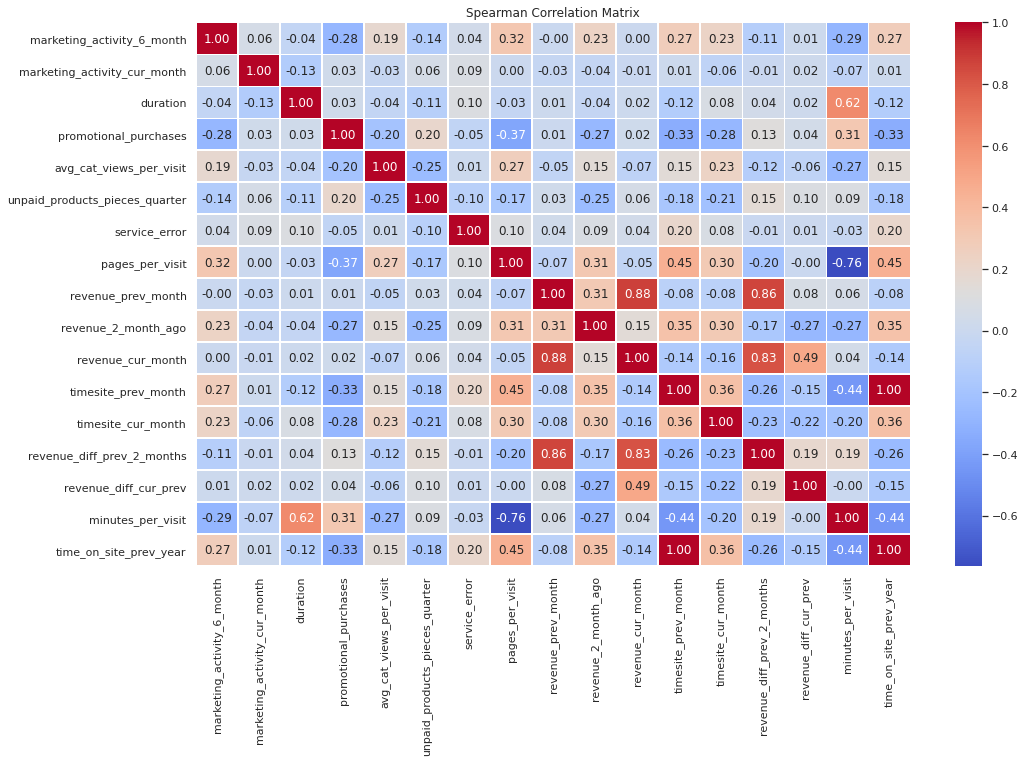

In [303]:
#построим тепловую карту для матрицы корреляции
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Spearman Correlation Matrix')
plt.show()

Согласно полученной матрице корреляции можно отметить следующее:

- Сильные корреляции:

1) revenue_prev_month и revenue_cur_month (0.876). Высокая положительная корреляция, указывающая на то, что выручка в текущем месяце сильно связана с выручкой в предыдущем месяце.
2) revenue_cur_month и revenue_diff_cur_prev (0.489). Значительная положительная связь между выручкой в текущем месяце и разницей в выручке между текущим и предыдущим месяцем.
3) timesite_cur_month и time_on_site_prev_year (1.000). Абсолютная корреляция, что ожидаемо, так как time_on_site_prev_year рассчитывается как timesite_cur_month умноженное на 12.

- Отрицательные корреляции:

1) minutes_per_visit и pages_per_visit (-0.758). Сильная отрицательная корреляция, показывающая, что увеличение количества страниц на визит связано с уменьшением времени, проведенного за визит.
2) promotional_purchases и pages_per_visit (-0.364). Значительная отрицательная связь, указывающая на то, что количество промо-покупок уменьшается с увеличением страниц за визит.

- Слабые или незначительные корреляции:

1) Большинство других признаков имеют слабые корреляции между собой, что может указывать на низкую взаимосвязь между ними или на то, что их влияние неочевидно в данной выборке.

- Неожиданные или интересные корреляции:

1) marketing_activity_6_month и pages_per_visit (0.319). Умеренная положительная корреляция, показывающая, что более высокая маркетинговая активность связана с увеличением страниц за визит.
2) revenue_diff_cur_prev и minutes_per_visit (-0.009). Практически нулевая корреляция, указывающая на отсутствие взаимосвязи между разницей в выручке и временем, проведенным за визит.

In [304]:
#список непрерывных признаков
interval_cols = [
    'marketing_activity_6_month', 'duration', 'promotional_purchases', 'marketing_activity_prev_month',
    'revenue_prev_month', 'revenue_2_month_ago', 'revenue_cur_month', 'revenue_diff_prev_2_months', 
    'revenue_diff_cur_prev', 'minutes_per_visit'
]

In [305]:
# построим матрицу корреляций в том числе и для категориальных признаков с помощью phik_matrix() 
data.phik_matrix(interval_cols=interval_cols) 

,purchasing_activity,service_type,allow_reporting,marketing_activity_6_month,marketing_activity_cur_month,duration,promotional_purchases,popular_category,avg_cat_views_per_visit,unpaid_products_pieces_quarter,...,pages_per_visit,revenue_prev_month,revenue_2_month_ago,revenue_cur_month,timesite_prev_month,timesite_cur_month,revenue_diff_prev_2_months,revenue_diff_cur_prev,minutes_per_visit,time_on_site_prev_year
purchasing_activity,1.000000,0.129940,0.000000,0.544831,0.000000,0.099901,0.506276,0.299717,0.539607,0.405041,...,0.747331,0.224638,0.497393,0.197213,0.604355,0.569983,0.440798,0.110871,0.643690,0.604355
service_type,0.129940,1.000000,0.289965,0.089911,0.045258,0.401411,0.030010,0.070809,0.185391,0.113015,...,0.087776,0.000000,0.069704,0.124216,0.121210,0.061764,0.033308,0.071728,0.216019,0.121210
allow_reporting,0.000000,0.289965,1.000000,0.000000,0.052618,0.253831,0.012198,0.073684,0.070359,0.162524,...,0.097094,0.080842,0.000000,0.060907,0.063528,0.000000,0.085170,0.023562,0.029166,0.063528
marketing_activity_6_month,0.544831,0.089911,0.000000,1.000000,0.079854,0.000000,0.279553,0.150386,0.206788,0.217731,...,0.376035,0.155476,0.315331,0.039795,0.322830,0.331480,0.224523,0.102425,0.375478,0.322830
marketing_activity_cur_month,0.000000,0.045258,0.052618,0.079854,1.000000,0.174233,0.000000,0.136243,0.246633,0.142887,...,0.000000,0.051824,0.000000,0.000000,0.166871,0.079883,0.063881,0.000000,0.000000,0.166871
duration,0.099901,0.401411,0.253831,0.000000,0.174233,1.000000,0.000000,0.000000,0.186795,0.128222,...,0.128089,0.125572,0.113200,0.147048,0.046299,0.021117,0.176224,0.075895,0.413754,0.046299
promotional_purchases,0.506276,0.030010,0.012198,0.279553,0.000000,0.000000,1.000000,0.122385,0.199180,0.246665,...,0.350714,0.060733,0.226381,0.071094,0.314140,0.287292,0.161778,0.000000,0.288696,0.314140
popular_category,0.299717,0.070809,0.073684,0.150386,0.136243,0.000000,0.122385,1.000000,0.226116,0.254746,...,0.177637,0.252097,0.043528,0.237240,0.218727,0.113774,0.248469,0.000000,0.158186,0.218727
avg_cat_views_per_visit,0.539607,0.185391,0.070359,0.206788,0.246633,0.186795,0.199180,0.226116,1.000000,0.334927,...,0.293781,0.098440,0.176828,0.092597,0.219174,0.236298,0.130121,0.000000,0.202835,0.219174
unpaid_products_pieces_quarter,0.405041,0.113015,0.162524,0.217731,0.142887,0.128222,0.246665,0.254746,0.334927,1.000000,...,0.310843,0.193536,0.189320,0.166017,0.194298,0.158243,0.236596,0.045810,0.250581,0.194298


interval columns not set, guessing: ['marketing_activity_6_month', 'marketing_activity_cur_month', 'duration', 'promotional_purchases', 'avg_cat_views_per_visit', 'unpaid_products_pieces_quarter', 'service_error', 'pages_per_visit', 'revenue_prev_month', 'revenue_2_month_ago', 'revenue_cur_month', 'timesite_prev_month', 'timesite_cur_month', 'revenue_diff_prev_2_months', 'revenue_diff_cur_prev', 'minutes_per_visit', 'time_on_site_prev_year']


<AxesSubplot:>

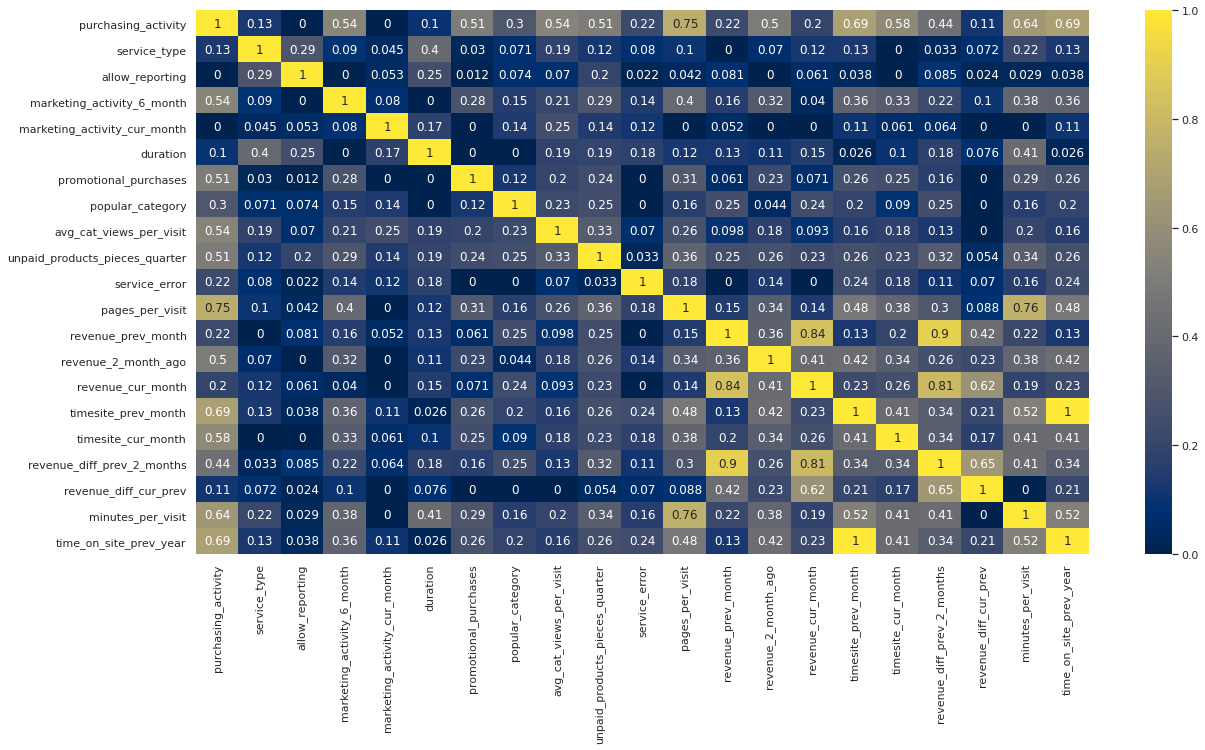

In [306]:
#визуализируем полученную матрицу
plt.figure(figsize=(20,10))
sns.heatmap(data.phik_matrix(interval_cols=interval_cols), annot=True, cmap='cividis');

Можно отметить следующие ключевые наблюдения данной корреляционной матрицы

- Сильные корреляции:

purchasing_activity имеет сильную положительную корреляцию с marketing_activity_6_month (0.544), avg_cat_views_per_visit  (0.54), promotional_purchases (0.5) и pages_per_visit (0.751), unpaid_products_pieces_quarter (0.5), minutes_per_visit	(0.64), time_on_site_prev_year(0.68),  timesite_prev_month (0.58), timesite_prev_month(0.69).

- Слабые или незначительные корреляции:

1) service_type и purchasing_activity (0.13). Очень слабая положительная связь между типом сервиса и покупательской активностью.
2) service_error и purchasing_activity (0.22). Небольшая положительная связь между ошибками сервиса и кпокупательской активностью.
3) purchasing_activity и: duration (0.088), revenue_prev_month (0.16), revenue_diff_cur_prev (0.1), revenue_cur_month (0.2).

- Нулевые значения корреляции: 

purchasing_activity имеет нулевую корреляцию с allow_reporting и marketing_activity_cur_month. Возможно связь есть, но она нелинейная

Расчёт VIF помогает определить, насколько степень корреляции между признаками может повлиять на устойчивость модели. Значения VIF выше 10 (или иногда 5) указывают на значительную мультиколлинеарность.

In [307]:
quantitative_columns = ['marketing_activity_6_month', 
                        'marketing_activity_cur_month', 'duration', 'promotional_purchases', 
                         'avg_cat_views_per_visit', 
                        'unpaid_products_pieces_quarter',  
                        'pages_per_visit', 'revenue_prev_month', 'revenue_2_month_ago', 
                        'revenue_cur_month', 'timesite_prev_month', 'timesite_cur_month', 
                        'revenue_diff_prev_2_months', 'revenue_diff_cur_prev', 
                        'minutes_per_visit', 'time_on_site_prev_year', 'service_error']

In [308]:
# удалим нечисловые столбцы
numeric_data = data[quantitative_columns].copy()

In [309]:
numeric_data.head(2)

,marketing_activity_6_month,marketing_activity_cur_month,duration,promotional_purchases,avg_cat_views_per_visit,unpaid_products_pieces_quarter,pages_per_visit,revenue_prev_month,revenue_2_month_ago,revenue_cur_month,timesite_prev_month,timesite_cur_month,revenue_diff_prev_2_months,revenue_diff_cur_prev,minutes_per_visit,time_on_site_prev_year,service_error
1,4.4,4,819,0.75,4,4,5,5216.0,4472.0,4971.6,12,10,744.0,-244.4,163.8,144,2
2,4.9,3,539,0.14,5,2,5,5457.5,4826.0,5058.4,8,13,631.5,-399.1,107.8,96,1


In [310]:
# добавим константы для расчета VIF
X = add_constant(numeric_data)

In [311]:
#вычислим VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

/opt/conda/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [312]:
vif_data

,feature,VIF
0,const,371.070614
1,marketing_activity_6_month,1.220911
2,marketing_activity_cur_month,1.044709
3,duration,1.442450
4,promotional_purchases,1.185970
5,avg_cat_views_per_visit,1.178787
6,unpaid_products_pieces_quarter,1.200851
7,pages_per_visit,2.084072
8,revenue_prev_month,inf
9,revenue_2_month_ago,inf


Переменные с бесконечным значением VIF (inf) указывают на сильную мультиколлинеарность, что означает, что эти переменные имеют идеальную или почти идеальную линейную зависимость от других переменных. Это может происходить, если переменные содержат идентичную информацию или если они являются функцией друг друга. В нашем случае это касается переменных: revenue_prev_month, revenue_2_month_ago, revenue_cur_month, timesite_prev_month, revenue_diff_prev_2_months, revenue_diff_cur_prev, time_on_site_prev_year

Посмотрим, что будет, если оставим только те признаки, которые указаны на диаграмме Исикавы 

In [313]:
quantitative_columns2 = ['marketing_activity_6_month', 
                        'marketing_activity_cur_month', 'duration', 'promotional_purchases', 'avg_cat_views_per_visit', 
                        'unpaid_products_pieces_quarter', 
                        'pages_per_visit', 
                        'revenue_cur_month', 'timesite_prev_month', 'timesite_cur_month', 
                        'revenue_diff_prev_2_months', 'revenue_diff_cur_prev', 
                        'minutes_per_visit', 'time_on_site_prev_year'] 

In [314]:
# удалим нечисловые столбцы
numeric_data2 = data[quantitative_columns2].copy()

In [315]:
# добавим константы для расчета VIF
X = add_constant(numeric_data2)

In [316]:
#вычислим VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

/opt/conda/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [317]:
vif_data

,feature,VIF
0,const,370.902962
1,marketing_activity_6_month,1.219702
2,marketing_activity_cur_month,1.031164
3,duration,1.410044
4,promotional_purchases,1.184408
5,avg_cat_views_per_visit,1.178504
6,unpaid_products_pieces_quarter,1.197158
7,pages_per_visit,2.083462
8,revenue_cur_month,8.533063
9,timesite_prev_month,inf


Стало получше. Рассчитанные значения VIF показывают, что для некоторых переменных (timesite_prev_month и time_on_site_prev_year) значение равно inf, что указывает на высокую степень мультиколлинеарности. Можно попробовать удалить эти данные или использовать методы регуляризации.

Попробуем удалить данные time_on_site_prev_year для избежания мультиколлинеарности с timesite_prev_month

In [318]:
quantitative_columns3 = ['marketing_activity_6_month', 
                        'marketing_activity_cur_month', 'duration', 'promotional_purchases', 'avg_cat_views_per_visit', 
                        'unpaid_products_pieces_quarter', 
                        'pages_per_visit', 
                        'revenue_cur_month', 'timesite_prev_month', 'timesite_cur_month', 
                        'revenue_diff_prev_2_months', 'revenue_diff_cur_prev', 
                        'minutes_per_visit']

In [319]:
# удалим нечисловые столбцы
numeric_data3 = data[quantitative_columns3].copy()

In [320]:
# добавим константы для расчета VIF
X = add_constant(numeric_data3)

In [321]:
#вычислим VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [322]:
vif_data

,feature,VIF
0,const,370.902962
1,marketing_activity_6_month,1.219702
2,marketing_activity_cur_month,1.031164
3,duration,1.410044
4,promotional_purchases,1.184408
5,avg_cat_views_per_visit,1.178504
6,unpaid_products_pieces_quarter,1.197158
7,pages_per_visit,2.083462
8,revenue_cur_month,8.533063
9,timesite_prev_month,1.489342


Теперь можно сказать, что мы избавились от мультиколлинеарности

## Использование пайплайнов

In [323]:
final_data.head()

,id,purchasing_activity,service_type,allow_reporting,marketing_activity_6_month,marketing_activity_cur_month,duration,promotional_purchases,popular_category,avg_cat_views_per_visit,...,pages_per_visit,revenue_prev_month,revenue_2_month_ago,revenue_cur_month,timesite_prev_month,timesite_cur_month,revenue_diff_prev_2_months,revenue_diff_cur_prev,minutes_per_visit,time_on_site_prev_year
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,...,5,5216.0,4472.0,4971.6,12,10,744.0,-244.4,163.8,144
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,...,5,5457.5,4826.0,5058.4,8,13,631.5,-399.1,107.8,96
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,...,4,6158.0,4793.0,6610.4,11,13,1365.0,452.4,224.0,132
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,...,2,5807.5,4594.0,5872.5,8,11,1213.5,65.0,532.0,96
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,...,4,4738.5,5124.0,5388.5,10,10,-385.5,650.0,190.5,120


In [324]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 1 to 1299
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1296 non-null   int64  
 1   purchasing_activity             1296 non-null   object 
 2   service_type                    1296 non-null   object 
 3   allow_reporting                 1296 non-null   object 
 4   marketing_activity_6_month      1296 non-null   float64
 5   marketing_activity_cur_month    1296 non-null   int64  
 6   duration                        1296 non-null   int64  
 7   promotional_purchases           1296 non-null   float64
 8   popular_category                1296 non-null   object 
 9   avg_cat_views_per_visit         1296 non-null   int64  
 10  unpaid_products_pieces_quarter  1296 non-null   int64  
 11  service_error                   1296 non-null   int64  
 12  pages_per_visit                 12

Напишем наш паплайн

In [325]:
RANDOM_STATE = 42
TEST_SIZE = 0.25
#разделим наши данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    final_data.drop(['id', 'purchasing_activity', 'revenue_prev_month', 'revenue_2_month_ago', 'time_on_site_prev_year'], axis=1),
    final_data['purchasing_activity'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = final_data['purchasing_activity'])
X_train.shape, X_test.shape

((972, 17), (324, 17))

In [326]:
#закодируем целевую переменную
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

Далее обозначим, какие данные требуют масштабирования, а какие — кодирования.

'service_type', 'allow_reporting' - упорядоченные, их нужно кодироваться с помощью OrdinalEncoder. А признак 'popular_category' с 6 вариантами ответа мы закодируем с помощью OneHotEncoder, чтобы не множить признаки.

В количественные признаки num_columns мы добавим те столбцы, которые оставили после удаления мультиколлинеарности.

In [327]:
# создаём списки с названиями признаков
ohe_columns = ['popular_category']  
ord_columns = ['service_type', 'allow_reporting']  

In [328]:
num_columns = ['marketing_activity_6_month', 
                        'marketing_activity_cur_month', 'duration', 'promotional_purchases', 'avg_cat_views_per_visit', 
                        'unpaid_products_pieces_quarter', 
                        'pages_per_visit', 
                        'revenue_cur_month', 'timesite_prev_month', 'timesite_cur_month', 
                        'revenue_diff_prev_2_months', 'revenue_diff_cur_prev', 
                        'minutes_per_visit']

При кодировании неизвестных категорий могут возникнуть пропуски. Обработать их поможет инструмент SimpleImputer, который заменит недостающие значения в данном случае на моду. 

In [329]:
# создаём пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline(
    [
        ('simpleImputer_ohe', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
        ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
    ]
)

In [330]:
# создаём пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline(
    [('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
     ('ord',  OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум'], 
                    ['нет', 'да']
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
     ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
    ]
)

In [331]:
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('ord', ord_pipe, ord_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough', force_int_remainder_cols=False
)

In [332]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])
param_grid= [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range (1, 10),
        'models__max_features': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range (1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(1, 10),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # словарь для модели SVC()
    {
        'models': [SVC(
            random_state=RANDOM_STATE, probability=True
        )],
        'models__C': range(1, 10),
        'models__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }
]

Теперь задача стоит определиться с метрикой, подходящей для нашей задачи. Я предполагаю, что хорошим вариантом для нашей задачи будут roc_auc и f1. ROC AUC хороша, если мы хотим понять, насколько хорошо модель различает между классами по всем возможным порогам. F1-Score лучше, если важно иметь хороший баланс между точностью и полнотой для положительного класса.

Для нашей задачи оценки покупательской активности подходящей метрикой будет F1-Score. Эта метрика особенно полезна в случаях с несбалансированными классами, когда важно учитывать как точность (precision), так и полноту (recall). Наша задача — предсказать снижение активности клиентов, и, вероятно, количество клиентов с снижением активности (положительный класс) меньше по сравнению с клиентами, у которых активность осталась на прежнем уровне (отрицательный класс). В таких случаях F1-Score помогает лучше сбалансировать точность и полноту модели.

In [333]:
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    n_iter=10,
    cv=5,
    scoring='f1',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

randomized_search.fit(X_train, y_train_encoded)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(force_int_remainder_cols=False,
                                                                remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['popular_category']),
                                                                              ('ord',
                                                                               P...
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': range(1, 10),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(probability=True,
                                                        random_state=42)],
                                         'models__C': range(1, 10),
                                         'models__kernel': ['linear', 'poly',
                                                            'rbf', 'sigmoid'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='f1')

В результате RandomizedSearchCV была выбрана модель SVC (Support Vector Classifier) с параметром C=6. Это означает, что модель с этим параметром показала наилучшие результаты по выбранной метрике (f1-score) на наших данных. Использование MinMaxScaler для числовых данных было выбрано в оптимальном пайплайне.

Однако тут вопрос, почему второй параметр kernel не отражен в конечной оптимальной модели среди лучших параметров. Тут два варианта: либо для всех значений kernel модель SVC с параметром C=6 не показала значительного улучшения по сравнению с другими параметрами, либо значения для kernel были пропущены в процессе поиска. Это может произойти, если, например, модель SVC с определенными значениями kernel не дала значительного улучшения по сравнению с другими значениями C, что привело к их исключению в лучшем результатах.

In [334]:
print('Метрика f1 для лучшей модели:\n', randomized_search.best_score_)
print('\nЛучшая модель и её параметры:\n\n', randomized_search.best_estimator_) 

Метрика f1 для лучшей модели:
 0.8050103342368218

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['popular_category']),
                                                 

Проверим еще с метрикой roc_auc

In [335]:
randomized_search = RandomizedSearchCV(
    pipe_final,
    param_grid,
    n_iter=10,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

randomized_search.fit(X_train, y_train_encoded)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(force_int_remainder_cols=False,
                                                                remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['popular_category']),
                                                                              ('ord',
                                                                               P...
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': range(1, 10),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(probability=True,
                                                        random_state=42)],
                                         'models__C': range(1, 10),
                                         'models__kernel': ['linear', 'poly',
                                                            'rbf', 'sigmoid'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [336]:
print('Метрика roc_auc для лучшей модели:\n', randomized_search.best_score_)
print('\nЛучшая модель и её параметры:\n\n', randomized_search.best_estimator_) 

Метрика roc_auc для лучшей модели:
 0.8929703844340209

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(force_int_remainder_cols=False,
                                   remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['popular_category']),
                                            

Таким образом, в качестве лучшей, была выбрана модель SVC(C=6, probability=True, random_state=42). Метрика roc_auc для лучшей модели: 0.8929703844340209. Метрика f1 для лучшей модели:  0.8050103342368218. Качество модели довольно неплохое, 

In [337]:
# проверим работу модели на тестовой выборке
# рассчитаем прогноз на тестовых данных
y_test_pred = randomized_search.predict(X_test)
y_test_proba = randomized_search.predict_proba(X_test)[:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test_encoded, y_test_pred)}')
print(f'Метрика f1 на тестовой выборке: {f1_score(y_test_encoded, y_test_pred)}')

Метрика ROC-AUC на тестовой выборке: 0.8990413784734862
Метрика f1 на тестовой выборке: 0.8849557522123894


Однако, у меня возникает большой вопрос, почему у меня метрики на тестовых данных чуть выше?

In [338]:
#проверим распределения классов
train_class_distribution = pd.Series(y_train_encoded).value_counts(normalize=True)
test_class_distribution = pd.Series(y_test_encoded).value_counts(normalize=True)

print("Распределение классов в тренировочных данных:")
print(train_class_distribution)
print("\nРаспределение классов в тестовых данных:")
print(test_class_distribution)

Распределение классов в тренировочных данных:
0    0.618313
1    0.381687
dtype: float64

Распределение классов в тестовых данных:
0    0.62037
1    0.37963
dtype: float64


In [339]:
#выведем результаты перекрестной проверки
cv_results = randomized_search.cv_results_

#создадим DataFrame для удобного анализа
cv_results_df = pd.DataFrame(cv_results)
print("Результаты перекрестной проверки:")
print(cv_results_df[['mean_test_score', 'params']])

Результаты перекрестной проверки:
   mean_test_score                                             params
0         0.803026  {'preprocessor__num': MinMaxScaler(), 'models_...
1         0.767342  {'preprocessor__num': 'passthrough', 'models__...
2         0.888116  {'preprocessor__num': MinMaxScaler(), 'models_...
3         0.790426  {'preprocessor__num': StandardScaler(), 'model...
4         0.795692  {'preprocessor__num': StandardScaler(), 'model...
5         0.817215  {'preprocessor__num': 'passthrough', 'models__...
6         0.792536  {'preprocessor__num': 'passthrough', 'models__...
7         0.523454  {'preprocessor__num': 'passthrough', 'models__...
8         0.892970  {'preprocessor__num': MinMaxScaler(), 'models_...
9         0.820082  {'preprocessor__num': MinMaxScaler(), 'models_...


In [340]:
#проверим предсказания и вероятности
y_test_pred = randomized_search.predict(X_test)
y_test_proba = randomized_search.predict_proba(X_test)[:, 1]

print("Примеры предсказаний на тестовых данных:")
print(y_test_pred[:10])
print("\nПримеры вероятностей на тестовых данных:")
print(y_test_proba[:10])

Примеры предсказаний на тестовых данных:
[0 1 0 1 0 0 0 0 0 0]

Примеры вероятностей на тестовых данных:
[0.01508162 0.95062915 0.13085137 0.89453852 0.38685017 0.0539757
 0.03329967 0.03196793 0.25610943 0.28028552]


In [341]:
#проверим наличие NaN в данных
print("Проверка на NaN в предсказаниях и вероятностях:")
print(f"NaN в y_test_pred: {np.any(np.isnan(y_test_pred))}")
print(f"NaN в y_test_proba: {np.any(np.isnan(y_test_proba))}")

#проверим диапазон вероятностей
print("Проверка диапазона вероятностей:")
print(f"Минимальная вероятность: {np.min(y_test_proba)}")
print(f"Максимальная вероятность: {np.max(y_test_proba)}")

Проверка на NaN в предсказаниях и вероятностях:
NaN в y_test_pred: False
NaN в y_test_proba: False
Проверка диапазона вероятностей:
Минимальная вероятность: 0.007473732473546142
Максимальная вероятность: 0.9999893825691378


Далее сравним нашу лучшую модель с константной моделью

In [342]:
dummy_model = DummyClassifier(strategy='most_frequent', random_state=RANDOM_STATE)
dummy_model.fit(X_train, y_train_encoded)

#посмотрим на предсказания константной модели на тестовых данных
y_dummy_pred = dummy_model.predict(X_test)
y_dummy_proba = dummy_model.predict_proba(X_test)[:, 1] 

#оценим качество константной модели
dummy_roc_auc = roc_auc_score(y_test_encoded, y_dummy_pred)
dummy_f1 = f1_score(y_test_encoded, y_dummy_pred)

print(f'Метрика ROC-AUC для константной модели: {dummy_roc_auc}')
print(f'Метрика f1 для константной модели: {dummy_f1}')

Метрика ROC-AUC для константной модели: 0.5
Метрика f1 для константной модели: 0.0


Наша лучшая модель значительно превосходит константную модель, что подтверждает, что все усилия по созданию новых признаков, тюнингу и кросс-валидации оправданы. Это также подтверждает, что наша модель вносит существенный вклад в улучшение качества предсказаний по сравнению с простым подходом.

## Анализ важности признаков

Далее оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP

Сначала попробуем оценить важность признаков с помощью SelectKBest

In [343]:
best_pipeline = randomized_search.best_estimator_
best_model = best_pipeline.named_steps['models']

In [344]:
preprocessor = best_pipeline.named_steps['preprocessor']

In [345]:
#преобразуем X_test_transformed
X_test_transformed = preprocessor.transform(X_test)
X_train_transformed = preprocessor.transform(X_train)

In [346]:
#создадим объект SelectKBest и применим его к данным
selector = SelectKBest(score_func=f_classif, k='all') 
X_train_selected = selector.fit_transform(X_train_transformed, y_train)

In [347]:
#получим результаты важности признаков
scores = selector.scores_
p_values = selector.pvalues_

In [ ]:
scores

In [348]:
#отобразим важности признаков
feature_names = np.array(preprocessor.get_feature_names_out())
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Score': scores
}).sort_values(by='Score', ascending=False)

In [349]:
#выведем на экран значения важности признаков
feature_importances

,Feature,Score
13,num__pages_per_visit,322.248692
15,num__timesite_prev_month,291.660973
19,num__minutes_per_visit,234.441223
16,num__timesite_cur_month,208.779643
10,num__promotional_purchases,192.246445
7,num__marketing_activity_6_month,166.796765
11,num__avg_cat_views_per_visit,162.288890
12,num__unpaid_products_pieces_quarter,155.653952
17,num__revenue_diff_prev_2_months,42.895492
2,ohe__popular_category_Мелкая бытовая техника и...,40.937178


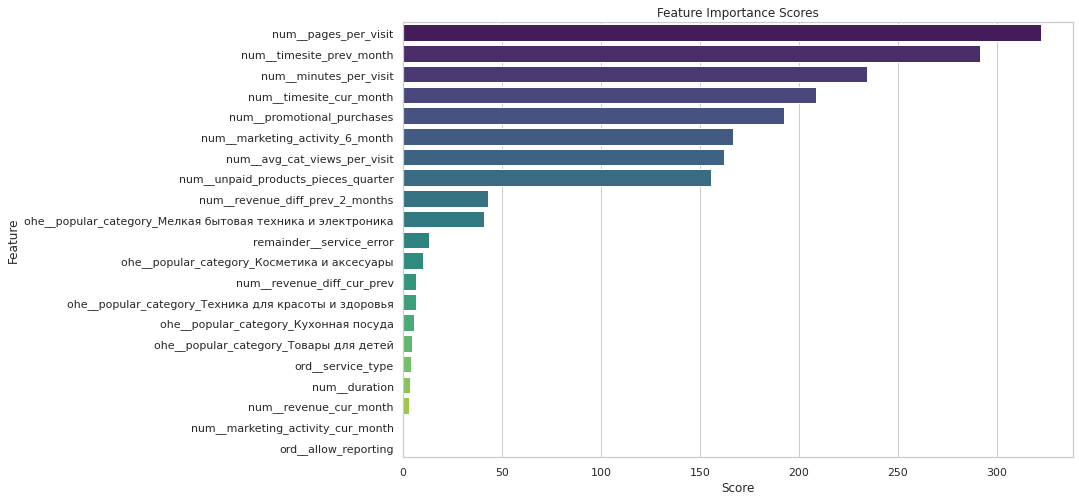

In [350]:
#нарисуем график
plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance Scores')
plt.xlabel('Score')
plt.ylabel('Feature')
plt.show()

Согласно графику, **наиболее важными признаками** являются: 1)num__pages_per_visit (333.00). Этот признак имеет наивысший показатель важности, что означает, что количество страниц, которые клиент просматривает за один визит, оказывает значительное влияние на целевую переменную. 2) num__timesite_prev_month (285.01). Время, проведенное на сайте в предыдущем месяце, также является важным фактором. 3) num__minutes_per_visit (222.94). Среднее время, проведенное на сайте за один визит, показывает высокую важность.

**Менее важные признаки**: num__marketing_activity_cur_month (0.01). В текущем месяце активность в маркетинговых действиях имеет крайне низкую важность, что может указывать на то, что текущие маркетинговые усилия не оказывают значительного влияния на целевую переменную.
Категориальные признаки ohe__service_type_стандарт (5.29) и ohe__allow_reporting_нет (0.16) имеют значительно меньшую важность по сравнению с числовыми признаками.

Основное внимание следует уделить признакам, таким как num__pages_per_visit, num__timesite_prev_month, и num__minutes_per_visit, так как они имеют наибольшее влияние на целевую переменную.

Проведем дополнительные исследования. Возможно, стоит провести дополнительные исследования, чтобы понять, как именно эти признаки влияют на целевую переменную и как можно использовать эти знания для улучшения бизнес-стратегий.
Для этого попробуем построим график важности с помощью метода SHAP

In [156]:
background_data = shap.kmeans(X_test_transformed, 100)

In [157]:
explainer = shap.KernelExplainer(best_model.predict_proba, background_data)
shap_values = explainer.shap_values(X_test_transformed)

  0%|          | 0/324 [00:00<?, ?it/s]

In [158]:
probabilities = best_model.predict_proba(X_test_transformed[:1])
print(probabilities)

[[0.98491838 0.01508162]]


In [159]:
best_model.predict_proba

<bound method BaseSVC.predict_proba of SVC(C=6, probability=True, random_state=42)>

In [160]:
shap_values

array([[[-0.0011516 ,  0.0011516 ],
        [ 0.00053617, -0.00053617],
        [-0.00773052,  0.00773052],
        ...,
        [-0.0080016 ,  0.0080016 ],
        [ 0.008908  , -0.008908  ],
        [ 0.01043913, -0.01043913]],

       [[-0.00281736,  0.00281736],
        [-0.00049684,  0.00049684],
        [-0.02066285,  0.02066285],
        ...,
        [ 0.00323966, -0.00323966],
        [-0.0032521 ,  0.0032521 ],
        [ 0.03270939, -0.03270939]],

       [[ 0.00368914, -0.00368914],
        [ 0.00021672, -0.00021672],
        [-0.00767024,  0.00767024],
        ...,
        [-0.00488815,  0.00488815],
        [ 0.01199996, -0.01199996],
        [-0.00763835,  0.00763835]],

       ...,

       [[-0.00920411,  0.00920411],
        [-0.00073717,  0.00073717],
        [-0.02276596,  0.02276596],
        ...,
        [-0.00152614,  0.00152614],
        [-0.06003396,  0.06003396],
        [-0.09344558,  0.09344558]],

       [[ 0.02281489, -0.02281489],
        [ 0.00039366, -0.00

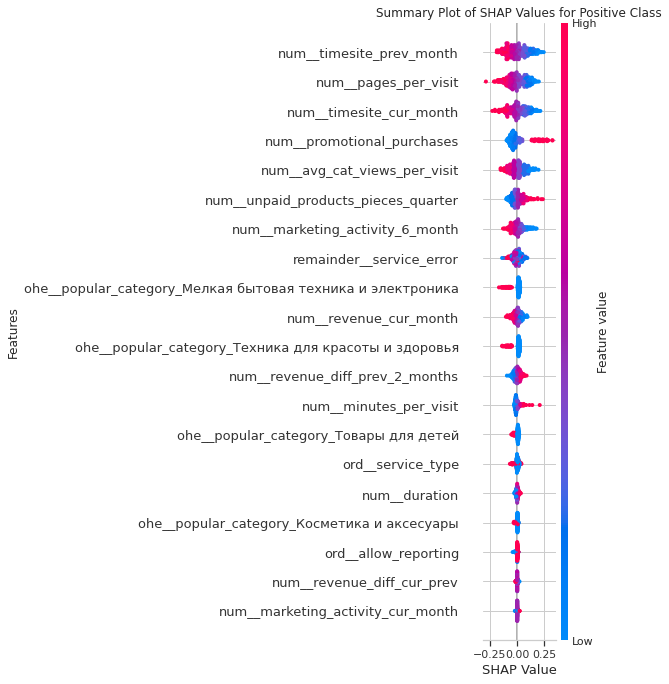

In [171]:
if isinstance(shap_values, list):
    # Получим SHAP значения для позитивного класса
    # SHAP значения для класса 1 (позитивный)
    shap_values_pos_class = shap_values[1]  
else:
    # Если shap_values это не список, возможно, это numpy array
    shap_values_pos_class = shap_values[:, :, 1]  

# Создаём фигуру и оси вручную
fig, ax = plt.subplots(figsize=(12, 8))  

# Выполним визуализацию SHAP
shap.summary_plot(shap_values_pos_class, X_test_transformed, feature_names=feature_names, show=False)

# Получаем текущие оси
current_ax = plt.gca()

# Добавляем подписи и заголовок
current_ax.set_xlabel('SHAP Value') 
current_ax.set_ylabel('Features')    
current_ax.set_title('Summary Plot of SHAP Values for Positive Class')  

# Показываем график
plt.show()

Согласно графику, высокие значения признака 'Количество страниц за визит/num__pages_per_visit' оказывают большое влияние на покупательскую активность, так высокие значения количества страниц за визит повышают вероятность того, что у клиента активность останется на прежнем уровне. И наоборот, если у клиентов мало просмотров страниц, то активность будет снижаться. Такая же тенденция отмечена у признаков: num__timesite_prev_month/время на сайте за предыдущий месяц, num__avg_cat_views_per_visit/ среднее количество просмотров категорий за визит, num__timesite_cur_month/ время на сайте за текущий месяц. Меньше влияния, но такая же тенденция отмечена у признаков: num__marketing_activity_6_month/маркетинговая активность за 6 месяцев, ord__popular_category/популярная категория (тут могу предположить, что клиенты, у кого популярная категория среди 'Техника для красоты и здоровья', 'Кухонная посуда','Мелкая бытовая техника и электроника' более склонны к сохранению активности, чем клиенты с популярной категорией 'Товары для детей', 'Домашний текстиль', 'Косметика и аксесуары').

Обратная тенденция наблюдается для признаков: num__promotional_purchases/промо-покупки (среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев), num__unpaid_products_pieces_quarter/количество неоплаченных товаров за квартал. С такой же тенденцией, но с меньшим влиянием можно также отметить признак num__revenue_diff_prev_2_months/разница в выручке за предыдущий и предпредыдущий месяцы

Мало значимыми признаками являются: num__revenue_diff_cur_prev/разница в выручке за текущий и предыдущий,  num__marketing_activity_cur_month/маркетинговая активность за текущий месяцмесяц, ohe__allow_reporting_нет/отказ от рассылки предложений, ohe__service_type_стандарт/уровень сервиса, «стандарт».

Данные, полученные с помощью SHAP являются ценными для бизнеса. Можно, например, так эти результаты использовать:

- **Оптимизировать маркетинговые стратегии.**
Можно использовать знание для оптимизации веб-сайта, чтобы стимулировать большее количество просмотров страниц. Это может включать улучшение навигации, предложения релевантного контента, улучшение пользовательского интерфейса, чтобы побудить пользователей просматривать больше страниц за визит.
Можно сфокусироваться на увеличении времени, проведенного пользователями на сайте. Это может быть достигнуто через улучшение качества контента, предоставление интерактивных элементов, или использование персонализированных рекомендаций.
Можно разработать стратегии для продвижения категорий товаров, которые увеличивают количество просмотров. Например, внедрение эффективных фильтров и поиска по категориям может помочь пользователям быстрее находить интересующие их товары.

- **Сегментировать клиентов.**
Можно использовать информацию о популярных категориях для таргетинга. Например, если определенные категории товаров (например, «Техника для красоты и здоровья») склонны поддерживать активность, можно разработать специальные предложения или акции для этих категорий. Для клиентов с высокой маркетинговой активностью можно рассмотреть возможность внедрения более агрессивных маркетинговых кампаний, предлагая им эксклюзивные предложения или акции.

- **Корректировать предложения.**
Учитывая, что высокая доля промо-покупок и неоплаченных товаров связана с понижением активности, стоит пересмотреть стратегию скидок и акций, чтобы избежать излишнего давления на клиентов, что может привести к снижению их долгосрочной лояльности.

- **Улучшение клиентского опыта.**
Если признаки, такие как разница в выручке или отказ от рассылки, имеют незначительное влияние на активность, это может означать, что они менее критичны для текущего анализа. Мы можем уменьшить акцент на этих признаках в будущих моделях и сосредоточиться на тех, которые имеют более явное влияние.

- **Персонализировать рекомендации.**
Можно использовать полученные данные для создания персонализированных предложений и рекомендаций для различных сегментов пользователей. 

## Сегментация покупателей

Далее попробуем сегментировать покупателей используя k-means

In [198]:
# Кластеризуем покупателей
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=RANDOM_STATE)
data_clusters = kmeans.fit_predict(X_test_transformed)

In [199]:
#добавим результаты кластеризации к исходным данным
X_test_with_clusters = pd.DataFrame(X_test_transformed, columns=preprocessor.get_feature_names_out())
X_test_with_clusters['Cluster'] = data_clusters
X_test_with_clusters['ID'] = X_test.index

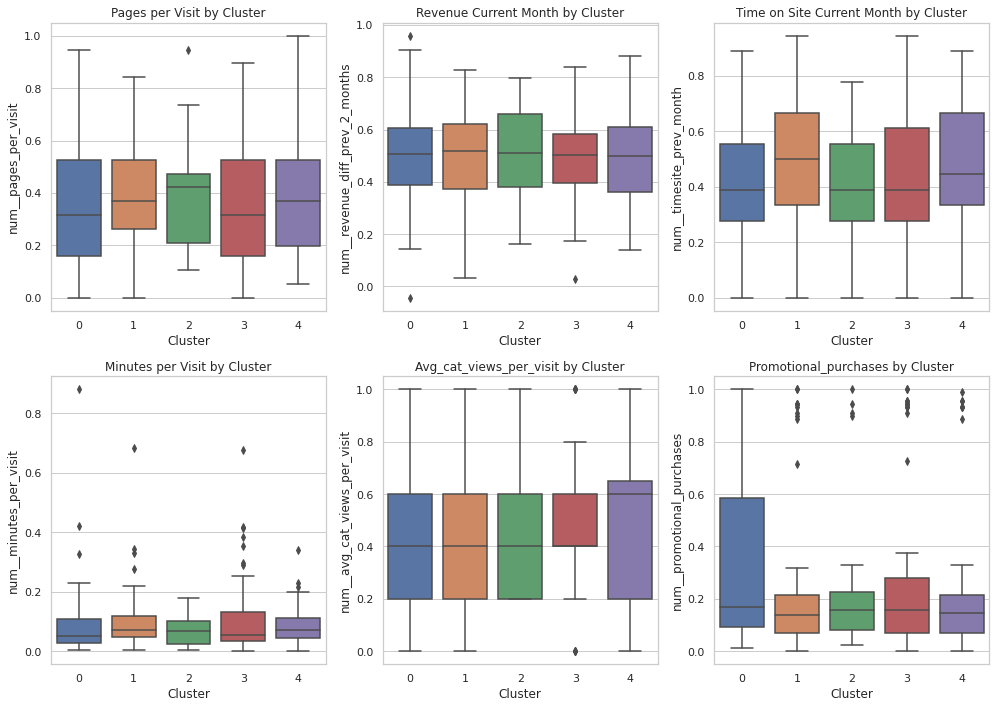

In [200]:
#проведем графический анализ разных кластеров
plt.figure(figsize=(14, 10))

#построим график распределения по количеству страниц за визит
plt.subplot(2, 3, 1)
sns.boxplot(x='Cluster', y='num__pages_per_visit', data=X_test_with_clusters)
plt.title('Pages per Visit by Cluster')

#построим график распределения по доходу 
plt.subplot(2, 3, 2)
sns.boxplot(x='Cluster', y='num__revenue_diff_prev_2_months', data=X_test_with_clusters)
plt.title('Revenue Current Month by Cluster')

#построим график распределения времени на сайте
plt.subplot(2, 3, 3)
sns.boxplot(x='Cluster', y='num__timesite_prev_month', data=X_test_with_clusters)
plt.title('Time on Site Current Month by Cluster')

#построим график количества посещений страниц
plt.subplot(2, 3, 4)
sns.boxplot(x='Cluster', y='num__minutes_per_visit', data=X_test_with_clusters)
plt.title('Minutes per Visit by Cluster')

#построим график  num__avg_cat_views_per_visit/ среднее количество просмотров категорий за визит
plt.subplot(2, 3, 5)
sns.boxplot(x='Cluster', y='num__avg_cat_views_per_visit', data=X_test_with_clusters)
plt.title('Avg_cat_views_per_visit by Cluster')

#построим график  num__promotional_purchases/промо-покупки 
plt.subplot(2, 3, 6)
sns.boxplot(x='Cluster', y='num__promotional_purchases', data=X_test_with_clusters)
plt.title('Promotional_purchases by Cluster')

plt.tight_layout()
plt.show()

Далее выведем статистические данные для этих графиков

In [201]:
# Статистика для 'num__pages_per_visit' по кластерам
pages_per_visit_desc = X_test_with_clusters.groupby('Cluster')['num__pages_per_visit'].describe()
print(pages_per_visit_desc)

# Статистика для 'num__revenue_cur_month' по кластерам
revenue_cur_month_desc = X_test_with_clusters.groupby('Cluster')['num__revenue_cur_month'].describe()
print(revenue_cur_month_desc)

# Статистика для 'num__timesite_cur_month' по кластерам
timesite_cur_month_desc = X_test_with_clusters.groupby('Cluster')['num__timesite_prev_month'].describe()
print(timesite_cur_month_desc)

# Статистика для 'num__minutes_per_visit' по кластерам
minutes_per_visit_desc = X_test_with_clusters.groupby('Cluster')['num__minutes_per_visit'].describe()
print(minutes_per_visit_desc)

# Статистика для 'num__avg_cat_views_per_visit' по кластерам
avg_cat_views_per_visit_desc = X_test_with_clusters.groupby('Cluster')['num__avg_cat_views_per_visit'].describe()
print(avg_cat_views_per_visit_desc)

# Статистика для 'num__promotional_purchases' по кластерам
promotional_purchases_desc = X_test_with_clusters.groupby('Cluster')['num__promotional_purchases'].describe()
print(promotional_purchases_desc)

         count      mean       std       min       25%       50%       75%  \
Cluster                                                                      
0         51.0  0.364293  0.225480  0.000000  0.157895  0.315789  0.526316   
1         86.0  0.392901  0.197540  0.000000  0.263158  0.368421  0.526316   
2         25.0  0.389474  0.218595  0.105263  0.210526  0.421053  0.473684   
3         74.0  0.352774  0.223930  0.000000  0.157895  0.315789  0.526316   
4         88.0  0.382177  0.214050  0.052632  0.197368  0.368421  0.526316   

              max  
Cluster            
0        0.947368  
1        0.842105  
2        0.947368  
3        0.894737  
4        1.000000  
         count      mean       std       min       25%       50%       75%  \
Cluster                                                                      
0         51.0  0.493401  0.145281  0.138711  0.376743  0.480251  0.593122   
1         86.0  0.494717  0.154325  0.127740  0.404220  0.483732  0.615976   
2

На основе полученных данных можно сделать следующие **выводы**:

- Среднее количество страниц за визит. Кластер 1 имеет самое высокое среднее значение (0.393), в то время как Кластер 3 — самое низкое (0.353).

- Кластер 4 показывает самое высокое значение (0.555), в то время как Кластер 1 — самое низкое (0.495).

- Среднее время на сайте за текущий месяц. Кластер 4 также имеет самое высокое значение (0.541), в то время как Кластер 2 — самое низкое (0.452).

- Среднее количество минут за визит. Кластер 3 имеет самое высокое значение (0.100), в то время как Кластер 2 — самое низкое (0.082).

- Среднее количество просмотров категорий за визит (num__avg_cat_views_per_visit). Кластер 3 имеет самое высокое значение (0.514), в то время как Кластер 2 — самое низкое (0.427).

- Количество промо-покупок (num__promotional_purchases). Кластер 3 имеет самое высокое среднее значение (0.24), в то время как Кластер 2 — самое низкое (0.23).

**Вывод**

- **Кластер 1.** Пользователи этого кластера имеют высокое количество страниц за визит, что указывает на активное использование сайта. Тем не менее, их доход и активность на сайте ниже, чем у других кластеров. Эти пользователи могут быть менее прибыльными, несмотря на активное использование сайта.

- **Кластер 4.** Пользователи в этом кластере выделяются высоким доходом и временем на сайте. Они также имеют значительное количество страниц за визит. Эти пользователи могут быть наиболее ценными клиентами, так как демонстрируют как высокую активность, так и значительный доход.

- **Кластер 3.** Характеризуется высоким количеством минут за визит и промо-покупками, что может указывать на высокий интерес и активность. Пользователи в этом кластере также имеют значительный доход.

- **Кластер 2.** Пользователи имеют среднее количество страниц за визит, но их доход и активность на сайте ниже, чем у других кластеров. Эти пользователи могут быть менее прибыльными, несмотря на активное использование сайта.

- **Кластер 0.** Пользователи имеют низкое количество страниц за визит и минут за визит, но высокие значения по доходу и просмотрам категорий. Эти пользователи могут быть менее активными, но при этом достаточно прибыльными.

In [202]:
X_test_with_clusters.columns

Index(['ohe__popular_category_Косметика и аксесуары',
       'ohe__popular_category_Кухонная посуда',
       'ohe__popular_category_Мелкая бытовая техника и электроника',
       'ohe__popular_category_Техника для красоты и здоровья',
       'ohe__popular_category_Товары для детей', 'ord__service_type',
       'ord__allow_reporting', 'num__marketing_activity_6_month',
       'num__marketing_activity_cur_month', 'num__duration',
       'num__promotional_purchases', 'num__avg_cat_views_per_visit',
       'num__unpaid_products_pieces_quarter', 'num__pages_per_visit',
       'num__revenue_cur_month', 'num__timesite_prev_month',
       'num__timesite_cur_month', 'num__revenue_diff_prev_2_months',
       'num__revenue_diff_cur_prev', 'num__minutes_per_visit',
       'remainder__service_error', 'Cluster', 'ID'],
      dtype='object')

Для дальнейшего анализа выберим кластер 0.

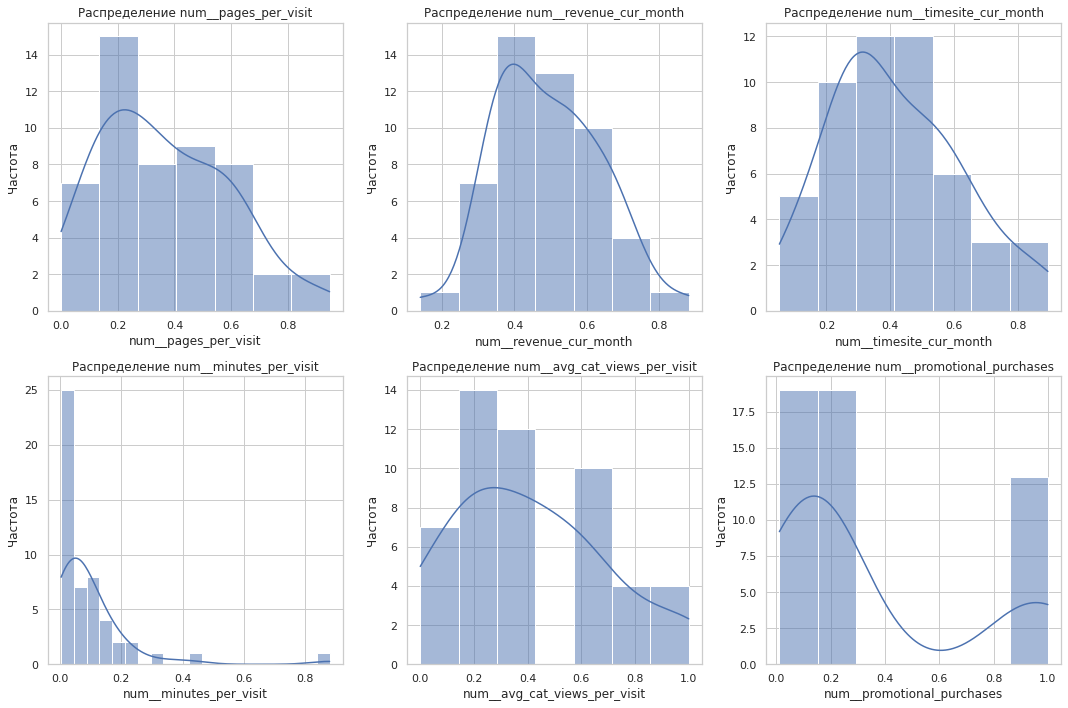

In [203]:
#профильтруем данные для Кластера 0
cluster_0_data = X_test_with_clusters[X_test_with_clusters['Cluster'] == 0]

#создадим графики распределения
features = ['num__pages_per_visit', 'num__revenue_cur_month', 'num__timesite_cur_month', 'num__minutes_per_visit', 'num__avg_cat_views_per_visit', 'num__promotional_purchases']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(cluster_0_data[feature], kde=True)
    plt.title(f'Распределение {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

In [204]:
# Получаем статистику по ключевым признакам
stats = cluster_0_data[features].describe()

In [205]:
stats

,num__pages_per_visit,num__revenue_cur_month,num__timesite_cur_month,num__minutes_per_visit,num__avg_cat_views_per_visit,num__promotional_purchases
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,0.364293,0.493401,0.415893,0.097776,0.407843,0.346702
std,0.225480,0.145281,0.203910,0.139019,0.288335,0.366483
min,0.000000,0.138711,0.052632,0.003786,0.000000,0.011364
25%,0.157895,0.376743,0.263158,0.027342,0.200000,0.090909
50%,0.315789,0.480251,0.368421,0.050444,0.400000,0.170455
75%,0.526316,0.593122,0.526316,0.108173,0.600000,0.585227
max,0.947368,0.883528,0.894737,0.879808,1.000000,1.000000


Пользователи в этом кластере, в среднем, посещают небольшое количество страниц за визит (0.364). Распределение значений имеет широкий разброс, что указывает на значительное разнообразие в этом показателе. Большинство пользователей находятся в пределах 0.16-0.53 страниц за визит. Средняя выручка за месяц достаточно высока (0.493) по сравнению с другими кластерами. Большинство значений сконцентрировано в пределах 0.38-0.59, что указывает на активных покупателей с высокой покупательской способностью. Пользователи проводят умеренное количество времени на сайте, что подтверждается средним значением (0.416) и широким разбросом значений. Это может свидетельствовать о высоком интересе к контенту или продуктам на сайте. Среднее количество минут за визит (0.098) достаточно низкое, что может указывать на то, что пользователи быстро находят то, что им нужно, или что сайт может быть недостаточно вовлекающим. Пользователи смотрят в среднем от 0.20 до 1.00 категорий за визит, что говорит о том, что они активно исследуют различные категории продуктов на сайте. Среднее количество рекламных покупок (0.347) не очень высокое, что указывает на потенциальную возможность для увеличения покупок через рекламные акции или специальные предложения.

**Рекомендации для увеличения покупательской активности**

- Улучшение вовлеченности. Поскольку среднее время на сайте за визит низкое, стоит провести анализ пользовательского опыта и улучшить интерфейс и контент сайта, чтобы увеличить время пребывания и взаимодействие с контентом.

- Увеличение числа просмотренных категорий. Разработать алгоритмы персонализированных рекомендаций для увеличения числа категорий, просматриваемых пользователями, и повышать их интерес к другим продуктам.

- Увеличение рекламных покупок. Запустить более целевые рекламные кампании и акции, которые привлекут внимание пользователей и стимулируют их к покупкам.

- Анализ продуктов. Проанализировать, какие категории наиболее популярны среди пользователей этого кластера, и акцентировать внимание на их продвижении.

## Общий вывод

Целью данного анализа являлась сегментация клиентов на основе их поведения на сайте и покупательской активности с целью выявления ключевых характеристик каждого сегмента и разработки рекомендаций для увеличения покупательской активности.
Мы работали с набором данных, содержащим различные показатели пользовательской активности на сайте, такие как количество страниц за визит, выручка за каждый из последних 3 месяцев, время на сайте, количество минут за визит, среднее количество просмотров категорий, рекламные покупки и тд. 
Была проведена предобработка данных и исследовательский анализ, после чего приступили к поиску лучшей модели. Для подготовки данных (масштабирования и кодирования) и выбора лучшей модели и гиперпараметров использовали pipeline. При подборе модели рассматривали такие, как: LogisticRegression, SVC, KNeighborsClassifier, и DecisionTreeClassifier со своими диапазонами гиперпараметров. Модели оценивались по метрикам, таким как F1-score и roc_auc. Был использован RandomizedSearchCV для подбора оптимальных параметров модели. В качестве лучшей модели была выбран - Support Vector Classifier (SVC) с оптимальными параметрами, включая C=6, для предсказания активности клиентов на сайте.
Далее с помощью SHAP и SelectKBest была проведена оценка важности каждого признака, построены графики. Так, выяснили, что наибольшее влияние на покупательскую активность оказывали такие признаки, как: количество страниц за визит, время на сайте за предыдущий и текущий месяц, среднее количество просмотров категорий за визит и популярные категории товаров. Мало значимыми признаками являлись промо-покупки, количество неоплаченных товаров за квартал, разница в выручке за предыдущие два месяца, разница в выручке за текущий и предыдущий месяц, маркетинговая активность за текущий месяц, отказ от рассылки предложений и уровень сервиса «стандарт». Эти факторы оказывали минимальное влияние на покупательскую активность.
Далее была проведена сегментация пользователей с помощью kmeans. Пользователей разделили на 5 кластеров и проанализировали их показатели. Пользователи кластера 0 имели низкое количество страниц за визит и минут за визит, но высокие значения по доходу и просмотрам категорий. Пользователи кластера 1 имели средние значения по большинству признаков и могут быть представлены как стандартная группа с умеренной активностью и доходом. Пользователи кластера 2 имели высокое количество страниц за визит, но их доход и активность на сайте ниже, чем у других кластеров. Пользователи кластера 3 характеризовались высоким количеством минут за визит и промо-покупками, что может указывать на высокий интерес и активность. Пользователи в этом кластере имеют также значительный доход. Пользователи кластера 4  выделялись высоким доходом и временем на сайте. Они могут быть наиболее ценными клиентами, так как демонстрируют как высокую активность, так и значительный доход.
На основе сегментации мы выбрали кластер 0 для дальнейшего анализа и сформировали рекомендации для данного кластера.